In [157]:
import numpy as np
from numpy import *
from numpy import nan
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

plt.style.use(astropy_mpl_style)

In [158]:
path = os.path.expanduser('~/notebook/Forrest/')
#Full Sample of 682 with all filters- Parameters
HW=Table.read(os.path.expanduser(path+'FORREST-PARAMETERS.csv')) 
HW=HW.to_pandas()
#EELGs from full sample
path2 = os.path.expanduser('~/Documents/')
comp_ew=Table.read(os.path.expanduser(path2+'comp_ew.dat'),format='ascii')
xy = comp_ew.to_pandas()
xyz = xy[xy['col1']<100000]
stuff = xyz.drop(['col3','col4'],axis=1)
stuff.rename(columns={'col1':'id' ,'col2':'redshift'} ,inplace=True)
EELGs=pd.merge(left=stuff['id'], right=HW, left_on='id', right_on='Galaxy_ID')
EELGs=EELGs.drop(['col0','id'],axis=1)
# Errorbars from full sample parameters
# HW_ers=Table.read(os.path.expanduser(path+'FORREST-Errorbars.csv')) 
# HW_ers=HW_ers.to_pandas()
#Unconstrained fits physical parameters
# BadFits = Table.read(os.path.expanduser(path+'Bad-IDs.csv'))
# BadFits = BadFits.to_pandas()
# BadFit = pd.merge(left=BadFits, right=HW, left_on='Galaxy_ID', right_on='Galaxy_ID')
# BadFit=BadFit.drop(['col0_x','col0_y'],axis=1)
# #Constrained fits physical parameters
# GoodFit=pd.merge(left=BadFits['Galaxy_ID'],right=HW, left_on='Galaxy_ID',right_on='Galaxy_ID', how='outer',indicator=True)
# GoodFit=GoodFit[GoodFit['_merge']=='right_only']
# GoodFit = GoodFit.drop(['col0','_merge'],axis=1)
# #Unconstrained EELG sample
# BadEELG = pd.merge(left=BadFits,right=EELGs,left_on='Galaxy_ID',right_on='Galaxy_ID')
# BadEELG=BadEELG.drop(['col0'],axis=1)
# #Constrained fits errorbars from the IRAC0 group - IRAC bands turned off
# GoodIRAC0 = Table.read(os.path.expanduser(path+'GoodIDs-Errorbars.csv'))
# GoodIRAC0 = GoodIRAC0.to_pandas()
# #Physical parameters of the 'Good' subsection of the IRAC0 sample. 
# GoodForrest = Table.read(os.path.expanduser(path+'GoodIRAC0-PARAMETERS.csv'))
# GoodForrest = GoodForrest.to_pandas()
#Constrained fits from the IRAC0 group - IRAC bands turned off (Previously unconstrained sample)
# BadIRAC0 = Table.read(os.path.expanduser(path+'GoodIDs-Errorbars.csv'))

In [7]:
# sum(FINAL['Galaxy_ID'].reset_index(drop=True) - HW['Galaxy_ID'])

In [172]:
FINAL = Table.read(os.path.expanduser(path+'FINAL-PARAMETERS.csv'), format='ascii')
FINAL=FINAL.to_pandas()
# FINAL.columns=FINAL.iloc[0]
# FINAL=FINAL.tail(-1)
# FINAL=FINAL.reset_index(drop=True)
FINAL

,Galaxy_ID,redshift,SFH $f_{mu}$,IR $f_{mu}$,$\mu$,$\tau_V$,sSFR$_{0.1Gyr}$,M(stars),Ldust,$T_C^{ISM}$,$T_W^{BC}$,$\chi_C^{tot}$,$\chi_{PAH}^{tot}$,$\chi_{MIR}^{tot}$,$\chi_{W}^{tot}$,$\tau_{V}^{ISM}$,M(dust),$SFR_{0.1Gyr}$,$A_V$,$age_M$,Tdust,lg(M/Lh),lg(M/Lk),chi2
0,6020,2.50071,0.808,0.689,0.353,0.605,2.005000e-11,259000000000,147100000000,45.1,26.1,0.612,0.137,0.053,0.198,0.214,55460000,5.194,0.234,9.041,31.569,-0.053,0.159,1.558
1,6235,2.77694,0.336,0.385,0.529,2.675,1.076000e-08,30000000000,4465000000000,60.2,24.0,0.282,0.113,0.320,0.285,1.416,1271000000,322.800,1.865,7.741,42.334,-0.167,0.048,2.257
2,6329,2.55376,0.381,0.385,0.129,7.868,2.516000e-09,37760000000,1044000000000,60.2,24.0,0.282,0.113,0.320,0.285,1.013,297300000,94.990,1.337,8.350,42.334,-0.246,-0.072,0.943
3,6465,2.80100,0.099,0.015,0.225,0.017,7.852000e-10,37110000000,15870000000,63.3,39.3,0.010,0.128,0.224,0.637,0.004,142000,29.140,0.006,8.846,62.863,-0.230,-0.013,7.400
4,6525,2.87872,0.356,0.385,0.404,1.262,1.415000e-09,56180000000,787400000000,60.2,24.0,0.282,0.113,0.320,0.285,0.510,224200000,79.500,0.646,8.780,42.334,-0.196,0.008,1.603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,30249,2.50950,0.358,0.385,0.341,1.573,4.197000e-09,26000000000,1145000000000,60.2,24.0,0.282,0.113,0.320,0.285,0.537,326000000,109.100,0.736,8.464,42.334,-0.207,0.012,9.102
678,30397,3.51017,0.205,0.385,0.155,1.276,7.447000e-09,9422000000,669600000000,60.2,24.0,0.282,0.113,0.320,0.285,0.197,190600000,70.160,0.418,7.990,42.334,-0.307,-0.068,4.479
679,30465,3.49404,0.383,0.385,0.465,1.577,3.775000e-09,54690000000,2349000000000,60.2,24.0,0.282,0.113,0.320,0.285,0.733,668700000,206.400,0.935,8.354,42.334,-0.286,-0.086,2.080
680,30690,2.67692,0.104,0.015,0.404,0.061,7.800000e-09,18780000000,287100000000,63.3,39.3,0.010,0.128,0.224,0.637,0.025,2569000,146.500,0.041,7.924,62.863,-0.714,-0.489,11.109


In [173]:
FINALEELG = pd.merge(left=FINAL,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')
FINALEELG

,Galaxy_ID,redshift,SFH $f_{mu}$,IR $f_{mu}$,$\mu$,$\tau_V$,sSFR$_{0.1Gyr}$,M(stars),Ldust,$T_C^{ISM}$,$T_W^{BC}$,$\chi_C^{tot}$,$\chi_{PAH}^{tot}$,$\chi_{MIR}^{tot}$,$\chi_{W}^{tot}$,$\tau_{V}^{ISM}$,M(dust),$SFR_{0.1Gyr}$,$A_V$,$age_M$,Tdust,lg(M/Lh),lg(M/Lk),chi2
0,7624,3.47300,0.309,0.385,0.330,0.677,2.385000e-09,36980000000,772000000000,60.2,24.0,0.282,0.113,0.320,0.285,0.223,219800000,88.19,0.289,8.496,42.334,-0.093,0.129,2.289
1,8366,3.03200,0.097,0.015,0.130,0.192,2.314000e-09,8855000000,88550000000,63.3,39.3,0.010,0.128,0.224,0.637,0.025,792400,20.49,0.049,8.604,62.863,-0.167,0.066,2.150
2,8841,3.50109,0.309,0.385,0.330,0.677,2.385000e-09,11390000000,237800000000,60.2,24.0,0.282,0.113,0.320,0.285,0.223,67690000,27.16,0.289,8.496,42.334,-0.093,0.129,2.273
3,8941,3.55717,0.183,0.015,0.199,0.456,1.847000e-09,9731000000,131700000000,63.3,39.3,0.010,0.128,0.224,0.637,0.091,1179000,17.97,0.136,8.691,62.863,-0.090,0.141,2.207
4,9517,3.52566,0.097,0.015,0.114,0.189,1.243000e-09,14730000000,77050000000,63.3,39.3,0.010,0.128,0.224,0.637,0.021,689500,18.31,0.038,8.805,62.863,-0.068,0.167,2.484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,28479,3.50674,0.309,0.385,0.330,0.677,2.385000e-09,26360000000,550400000000,60.2,24.0,0.282,0.113,0.320,0.285,0.223,156700000,62.87,0.289,8.496,42.334,-0.093,0.129,2.819
72,29009,3.37636,0.097,0.015,0.114,0.189,1.243000e-09,16450000000,86050000000,63.3,39.3,0.010,0.128,0.224,0.637,0.021,769900,20.44,0.038,8.805,62.863,-0.068,0.167,8.639
73,29093,3.71105,0.083,0.015,0.153,0.328,5.513000e-09,8966000000,455500000000,63.3,39.3,0.010,0.128,0.224,0.637,0.050,4076000,49.42,0.149,8.550,62.863,-0.373,-0.117,1.284
74,30231,3.16485,0.066,0.015,0.199,0.015,1.876000e-09,28190000000,25890000000,63.3,39.3,0.010,0.128,0.224,0.637,0.003,231700,52.88,0.006,8.705,62.863,-0.394,-0.182,8.745


In [46]:
FINAL_ers=Table.read(os.path.expanduser(path+'FINAL_ERRORBARS.csv')) 
FINAL_ers=FINAL_ers.to_pandas()
FINAL_ers

,col0,Galaxy_ID,sSFRl,sSFRh,SMl,SMh,SFRl,SFRh
0,0,6020,2.137962e-11,4.265795e-11,2.570396e+11,3.388442e+11,5.211947,15.559656
1,1,6235,5.308844e-09,1.188502e-08,2.454709e+10,3.019952e+10,132.434154,321.366054
2,2,6329,1.059254e-09,5.956621e-09,3.162278e+10,4.677351e+10,49.773708,224.905461
3,3,6465,7.498942e-10,7.498942e-10,3.715352e+10,3.715352e+10,28.973436,28.973436
4,4,6525,9.440609e-10,4.216965e-09,3.715352e+10,6.025596e+10,55.847019,202.768272
...,...,...,...,...,...,...,...,...
677,677,30249,4.216965e-09,1.059254e-08,1.584893e+10,2.570396e+10,98.174794,198.152703
678,678,30397,2.371374e-09,7.498942e-09,9.375620e+09,1.288250e+10,29.648314,70.307232
679,679,30465,1.333521e-09,5.956621e-09,4.897788e+10,1.023293e+11,79.799469,448.745390
680,680,30690,7.498942e-09,7.498942e-09,1.862087e+10,1.862087e+10,146.892628,146.892628


In [ ]:
FINAL_ers=Table.read(os.path.expanduser(path+'FINAL_ERRORBARS.csv')) 
FINAL_ers=FINAL_ers.to_pandas()
FINAL_ers

In [17]:
# import statistics
# plt.figure(figsize=(10,9))
# plt.scatter(log10(GoodForrest['M(stars)']), log10(GoodFit['M(stars)']))
# plt.plot(linspace(9,12,100),linspace(9,12,100))
# plt.title('Good sample before and after removing IRAC bands')
# plt.xlabel('IRAC data absent Stellar Mass')
# plt.ylabel('IRAC data present Stellar Mass')

# cov = mean((np.array(log10(GoodForrest['M(stars)']))- mean(np.array(log10(GoodForrest['M(stars)']))))*(np.array(log10(GoodFit['M(stars)']))- mean(np.array(log10(GoodFit['M(stars)'])))))
# Pearson_SM=cov/(statistics.stdev(np.array(log10(GoodForrest['M(stars)'])))*(statistics.stdev(np.array(log10(GoodFit['M(stars)'])))))
# plt.annotate(round(Pearson_SM,3),xy=(9,12))

# plt.figure(figsize=(10,9))
# plt.scatter(log10(GoodForrest[r'$SFR_{0.1Gyr}$']), log10(GoodFit[r'$SFR_{0.1Gyr}$']))
# plt.plot(linspace(0,4,100),linspace(0,4,100))
# plt.title('Good sample before and after removing IRAC bands')
# plt.xlabel('IRAC data absent SFR')
# plt.ylabel('IRAC data present SFR')

# cov = mean((np.array(log10(GoodForrest[r'$SFR_{0.1Gyr}$']))- mean(np.array(log10(GoodForrest[r'$SFR_{0.1Gyr}$']))))*(np.array(log10(GoodFit[r'$SFR_{0.1Gyr}$']))- mean(np.array(log10(GoodFit[r'$SFR_{0.1Gyr}$'])))))
# Pearson_SFR=cov/(statistics.stdev(np.array(log10(GoodForrest[r'$SFR_{0.1Gyr}$'])))*(statistics.stdev(np.array(log10(GoodFit[r'$SFR_{0.1Gyr}$'])))))
# plt.annotate(round(Pearson_SFR,3),xy=(0,4))

# plt.figure(figsize=(12,8))
# plt.scatter(log10(GoodForrest['M(stars)']), log10(GoodForrest[r'$SFR_{0.1Gyr}$']),label='No IRAC')
# plt.scatter(log10(GoodFit['M(stars)']),log10(GoodFit[r'$SFR_{0.1Gyr}$']) , label='IRAC')
# # plt.plot(linspace(9,12,100),linspace(9,12,100))
# plt.title('Good sample before and after removing IRAC bands')
# plt.xlabel('SM')
# plt.ylabel('SFR')
# plt.legend()

In [18]:
# mask2 = (HW['redshift']<3) 
# mask3 = (HW['redshift']<3.5) & (HW['redshift'] >3)
# mask4 = (HW['redshift']>3.5) 

In [19]:
# SM = log10(HW['M(stars)'])
# SFR = log10(HW[r'$SFR_{0.1Gyr}$'])
# SMa = log10(EELGs['M(stars)'])
# SFRa = log10(EELGs[r'$SFR_{0.1Gyr}$'])

# SFH=HW[r'SFH $f_{mu}$']
# SFHa=EELGs[r'SFH $f_{mu}$']
# IR=HW[r'IR $f_{mu}$']
# IRa=EELGs[r'IR $f_{mu}$']
# mu=HW[r'$\mu$']
# mua=EELGs[r'$\mu$']
# tauv=HW[r'$\tau_V$'] 
# tauva=EELGs[r'$\tau_V$']
# sSFR=log10(HW[r'sSFR$_{0.1Gyr}$'])
# sSFRa=log10(EELGs[r'sSFR$_{0.1Gyr}$'])
# Ldust=log10(HW['Ldust'])
# Ldusta=log10(EELGs['Ldust'])
# T_CISM=HW[r'$T_C^{ISM}$']
# T_CISMa=EELGs[r'$T_C^{ISM}$']
# T_WBC=HW[r'$T_W^{BC}$']
# T_WBCa=EELGs[r'$T_W^{BC}$']
# chiC=HW[r'$\chi_C^{tot}$']
# chiCa=EELGs[r'$\chi_C^{tot}$']
# chiPAH=HW[r'$\chi_{PAH}^{tot}$']
# chiPAHa=EELGs[r'$\chi_{PAH}^{tot}$']
# chiMIR=HW[r'$\chi_{MIR}^{tot}$']
# chiMIRa=EELGs[r'$\chi_{MIR}^{tot}$']
# chiW=HW[r'$\chi_{W}^{tot}$']
# chiWa=EELGs[r'$\chi_{W}^{tot}$']
# tauISM=HW[r'$\tau_{V}^{ISM}$']
# tauISMa=EELGs[r'$\tau_{V}^{ISM}$']
# Mdust=log10(HW['M(dust)'])
# Mdusta=log10(EELGs['M(dust)'])
# redshift=HW['redshift']
# redshifta=EELGs['redshift']
# chi2=HW['chi2']
# chi2a=EELGs['chi2']

In [88]:
SAMPLE_em = Table.read(os.path.expanduser('~/Documents/Sample-emission.csv'), format='ascii')
SAMPLE_em=SAMPLE_em.to_pandas()
pd.set_option('display.max_columns', None)
SAMPLE_em.sort_values(by=['id'],inplace=True)
SAMPLE_em

,id,z,mSFR,mpeak,mperiod,mskew,tau_birth,tau_screen,alpha_SF_birth,alpha_SF_screen,Zfinal,LP,masstot,dustmass.birth,dustmass.screen,dustmass.total,dustlum.birth,dustlum.screen,dustlum.total,SFRburst,StellarMass,mSFR_LB,mpeak_LB,mperiod_LB,mskew_LB,tau_birth_LB,tau_screen_LB,alpha_SF_birth_LB,alpha_SF_screen_LB,Zfinal_LB,LP_LB,masstot_LB,dustmass.birth_LB,dustmass.screen_LB,dustmass.total_LB,dustlum.birth_LB,dustlum.screen_LB,dustlum.total_LB,SFRburst_LB,StellarMass_LB,mSFR_UB,mpeak_UB,mperiod_UB,mskew_UB,tau_birth_UB,tau_screen_UB,alpha_SF_birth_UB,alpha_SF_screen_UB,Zfinal_UB,LP_UB,masstot_UB,dustmass.birth_UB,dustmass.screen_UB,dustmass.total_UB,dustlum.birth_UB,dustlum.screen_UB,dustlum.total_UB,SFRburst_UB,StellarMass_UB
597,6020,2.50071,3.337316,0.600257,-0.474427,-0.074041,1.339071,0.373334,2.088764,0.054844,-3.145448,-71.404702,1.767445e+12,4.596436e+09,7.162904e+07,4.668065e+09,1.547997e+12,8.129084e+12,9.677081e+12,426.684873,1.024352e+12,3.323912,0.572269,-0.481329,-0.173457,-0.542998,0.373198,0.335827,0.0,-3.553190,-76.475258,1.692741e+12,1.739971e+07,6.894098e+07,1.497247e+08,1.047197e+12,7.816809e+12,9.101459e+12,375.772574,9.810559e+11,3.337316,0.632310,-0.453757,0.017864,1.500000,0.378633,3.382998,1.370489,-2.703261,-71.404702,1.891659e+12,2.179375e+10,1.729983e+09,2.237019e+10,2.150720e+12,8.994274e+12,1.109641e+13,546.304437,1.096342e+12
598,6235,2.77694,2.647954,-0.990952,0.175265,0.826095,-0.040267,0.146163,2.652333,2.812616,-3.876114,-84.591579,7.510506e+10,7.030220e+09,1.575603e+10,2.278626e+10,1.026769e+12,2.032557e+12,3.059326e+12,209.832284,3.389702e+10,2.607126,-1.009888,0.168805,0.738660,-0.413304,0.141388,0.535382,0.0,-4.000000,-89.644357,6.894576e+10,1.393999e+07,1.598989e+07,8.066114e+07,8.337242e+11,1.814672e+12,2.677659e+12,197.863252,3.111716e+10,2.651651,-0.938991,0.186373,0.868435,0.253612,0.168095,3.556331,3.588292,-3.089194,-84.591579,9.759695e+10,1.154901e+10,2.167088e+10,3.072160e+10,1.183676e+12,2.310136e+12,3.468986e+12,232.821909,4.404824e+10
599,6329,2.55376,2.044198,0.394100,-0.686533,0.863554,-0.004921,0.028641,3.339279,0.564011,-1.430872,-55.236114,5.414857e+10,4.558936e+09,7.611759e+06,4.566547e+09,4.542630e+11,5.415170e+11,9.957800e+11,93.509333,3.700891e+10,1.968374,0.394100,-1.000000,0.759554,-0.498204,0.018960,0.585174,0.0,-1.928210,-60.246862,4.941242e+10,3.912123e+06,4.069250e+06,4.974315e+07,2.372487e+11,4.618137e+11,7.280840e+11,67.381209,3.377190e+10,2.044198,0.952879,-0.661536,1.000000,-0.002403,0.060044,3.632345,1.429259,-1.300000,-55.236114,8.406500e+10,4.911068e+09,1.360090e+08,4.917780e+09,4.569471e+11,6.241094e+11,9.957800e+11,94.317868,5.745589e+10
600,6465,2.80100,1.577558,-0.336449,0.544127,0.717604,0.108529,-1.236836,3.156621,0.098754,-4.000000,-112.046109,7.744835e+10,1.585997e+09,1.223852e+06,1.587221e+09,1.696088e+11,1.361167e+11,3.057255e+11,36.423586,1.799685e+10,1.562437,-0.660444,0.355790,0.105116,-0.009539,-1.419111,0.164573,0.0,-4.000000,-117.201781,6.853383e+10,1.590024e+06,1.080164e+06,5.318736e+06,1.578214e+11,1.184277e+11,2.762491e+11,34.620859,1.592536e+10,1.578075,0.100583,0.544127,1.000000,0.462558,-1.197140,3.211744,2.789232,-3.866626,-112.046109,9.016858e+10,1.636319e+09,1.023727e+09,2.117485e+09,1.778930e+11,1.409237e+11,3.111119e+11,36.840720,2.095268e+10
601,6525,2.87872,2.042860,0.588923,-0.871046,1.000000,0.220484,-0.258754,3.490718,3.852638,-1.531183,-63.036617,6.719760e+10,5.299587e+09,5.038711e+09,1.033830e+10,5.031697e+11,4.379069e+11,9.410766e+11,96.303495,4.549828e+10,2.003850,0.438938,-1.000000,0.777869,0.077826,-0.289938,0.979051,0.0,-1.809641,-68.211394,5.844089e+10,1.765770e+07,3.512928e+06,5.747429e+07,4.305959e+11,3.878806e+11,8.246768e+11,86.525267,3.956926e+10,2.046557,0.823190,-0.528464,1.000000,1.500000,-0.230642,4.000000,4.000000,-1.434382,-63.036617,8.333862e+10,6.161569e+09,5.192061e+09,1.079967e+10,5.258505e+11,4.873026e+11,9.689770e+11,96.528776,5.642707e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [89]:
ProEELG = pd.merge(left=SAMPLE_em,right=EELGs['Galaxy_ID'],left_on='id',right_on='Galaxy_ID')
# ProEELG=ProEELG.drop(['col0'],axis=1)
ProEELG

,id,z,mSFR,mpeak,mperiod,mskew,tau_birth,tau_screen,alpha_SF_birth,alpha_SF_screen,Zfinal,LP,masstot,dustmass.birth,dustmass.screen,dustmass.total,dustlum.birth,dustlum.screen,dustlum.total,SFRburst,StellarMass,mSFR_LB,mpeak_LB,mperiod_LB,mskew_LB,tau_birth_LB,tau_screen_LB,alpha_SF_birth_LB,alpha_SF_screen_LB,Zfinal_LB,LP_LB,masstot_LB,dustmass.birth_LB,dustmass.screen_LB,dustmass.total_LB,dustlum.birth_LB,dustlum.screen_LB,dustlum.total_LB,SFRburst_LB,StellarMass_LB,mSFR_UB,mpeak_UB,mperiod_UB,mskew_UB,tau_birth_UB,tau_screen_UB,alpha_SF_birth_UB,alpha_SF_screen_UB,Zfinal_UB,LP_UB,masstot_UB,dustmass.birth_UB,dustmass.screen_UB,dustmass.total_UB,dustlum.birth_UB,dustlum.screen_UB,dustlum.total_UB,SFRburst_UB,StellarMass_UB,Galaxy_ID
0,7624,3.47300,2.078336,0.138881,-0.563362,0.026633,1.466957,-2.493346,0.824010,0.035588,-1.300000,-90.644031,5.444383e+10,1.421399e+07,9.181129e+05,1.513210e+07,5.910050e+11,1.041954e+11,6.952004e+11,110.745462,3.506830e+10,2.065805,0.108912,-0.768850,-0.161592,0.284426,-2.500000,0.000000,0.0,-1.338569,-95.554996,4.255703e+10,5.102761e+06,8.675253e+05,8.144204e+06,5.216779e+11,9.268044e+10,6.143583e+11,105.139954,2.741179e+10,2.081651,0.178677,-0.323860,1.000000,1.500000,-1.425563,3.090506,4.000000,-1.300000,-90.644031,6.714736e+10,5.644817e+09,1.513816e+09,6.858357e+09,6.429256e+11,1.453124e+11,7.874454e+11,116.096148,4.325089e+10,7624
1,8366,3.03200,1.818525,0.116809,-0.766437,0.366450,1.299882,-0.463859,1.696974,0.202269,-3.297144,-68.408902,1.703140e+10,2.298657e+08,3.060216e+06,2.329259e+08,2.743355e+11,3.187086e+11,5.930441e+11,60.516880,1.204298e+10,1.804888,0.091440,-0.865808,-0.142629,0.265423,-0.515323,0.616417,0.0,-4.000000,-73.225691,1.391757e+10,4.235928e+06,2.265983e+06,1.708166e+07,1.744007e+11,2.523318e+11,4.473374e+11,49.676536,9.841177e+09,1.826327,0.185999,-0.650851,1.000000,1.500000,-0.415695,3.663587,4.000000,-2.972501,-68.408902,2.164422e+10,3.093587e+09,3.789393e+09,6.472962e+09,2.988851e+11,3.920710e+11,6.687932e+11,63.154797,1.530473e+10,8366
2,8841,3.50109,1.536642,0.311510,-0.500538,0.164669,-0.064344,-1.679685,0.936459,1.308326,-1.453404,-67.816958,2.048217e+10,3.767735e+06,3.827661e+06,7.595397e+06,1.123702e+11,2.574952e+10,1.381197e+11,25.821747,1.296071e+10,1.471193,0.228023,-0.831367,0.138949,-0.172668,-2.500000,0.000000,0.0,-1.572039,-72.879840,1.131679e+10,1.139412e+06,1.860576e+05,1.413204e+06,9.929952e+10,1.760315e+10,1.185547e+11,22.290887,7.161039e+09,1.564429,0.711735,-0.187617,1.000000,0.428899,-1.316236,1.603969,3.227908,-1.300000,-67.816958,3.171180e+10,6.969538e+07,2.919408e+08,2.933103e+08,1.530957e+11,3.853608e+10,1.791744e+11,30.870308,2.006659e+10,8841
3,8941,3.55717,1.472544,0.153878,-0.710818,0.841819,1.098716,-2.440862,3.041441,2.853860,-1.310040,-66.778255,8.161416e+09,1.315438e+09,2.336468e+08,1.549084e+09,1.484056e+11,2.932493e+10,1.777305e+11,27.386144,5.784648e+09,1.363449,-0.157100,-0.995551,-0.327676,-0.027098,-2.500000,0.035893,0.0,-1.991024,-71.872410,5.547581e+09,9.236311e+05,2.464487e+05,1.843259e+06,7.887878e+10,2.389575e+10,1.035857e+11,21.285362,3.932014e+09,1.498157,0.165368,-0.164504,1.000000,1.500000,-1.384158,3.056842,3.813284,-1.300000,-66.778255,1.922448e+10,1.315438e+09,4.029560e+08,1.584704e+09,1.605217e+11,4.372069e+10,1.963799e+11,29.499683,1.362592e+10,8941
4,9517,3.52566,1.610055,0.127051,-0.801070,-0.182501,0.049765,-2.103127,1.404355,0.000000,-1.645672,-73.970494,1.472296e+10,3.040491e+07,2.957814e+05,3.070069e+07,1.318431e+11,3.356784e+10,1.654109e+11,33.965284,9.731741e+09,1.568499,-0.036261,-0.878559,-0.283085,-0.078395,-2.500000,0.000000,0.0,-1.911748,-79.080678,1.026424e+10,1.502219e+06,2.838141e+05,2.400618e+06,1.110689e+11,2.875666e+10,1.427070e+11,32.528141,6.784565e+09,1.626462,0.183990,-0.373103,0.623648,1.500000,-1.180498,1.989886,2.492672,-1.431428,-73.970494,2.163720e+10,4.372711e+08,2.370710e+08,4.571564e+08,2.024121e+11,8.372033e+10,2.847918e+11,39.363406,1.430199e+10,9517
...,...,...,...,...,...,...,...

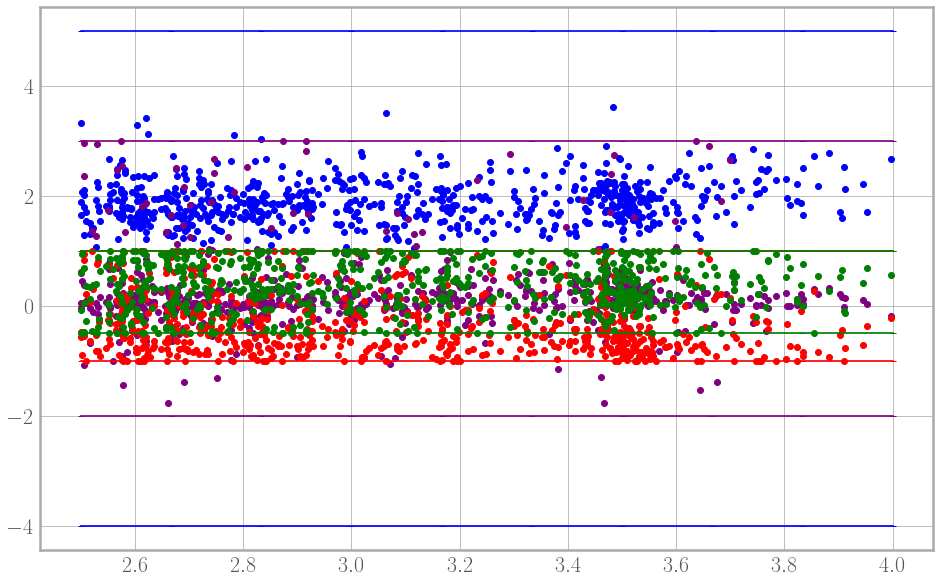

In [156]:
plt.figure(figsize=(16,10))
plt.scatter(SAMPLE_em['z'], SAMPLE_em['mSFR'], c='blue')
plt.plot(linspace(2.5,4,10),linspace(5,5,10),marker='_',c='blue')
plt.plot(linspace(2.5,4,10),linspace(-4,-4,10),marker='_',c='blue')
plt.scatter(SAMPLE_em['z'], SAMPLE_em['mpeak'],c='purple')
plt.plot(linspace(2.5,4,10),linspace(-2,-2,10),marker='_',c='purple')
plt.plot(linspace(2.5,4,10),linspace(3,3,10),marker='_',c='purple')
plt.scatter(SAMPLE_em['z'], SAMPLE_em['mperiod'],c='red')
plt.plot(linspace(2.5,4,10),linspace(-1,-1,10),marker='_',c='red')
plt.plot(linspace(2.5,4,10),linspace(1,1,10),marker='_',c='red')
plt.scatter(SAMPLE_em['z'], SAMPLE_em['mskew'],c='green')
plt.plot(linspace(2.5,4,10),linspace(-0.5,-0.5,10),marker='_',c='green')
plt.plot(linspace(2.5,4,10),linspace(1,1,10),marker='_',c='green')

In [90]:
#emission lines unaccounted for
SAMPLE_noem = Table.read(os.path.expanduser('~/Documents/Sample_un.csv'), format='ascii')
SAMPLE_noem=SAMPLE_noem.to_pandas()
pd.set_option('display.max_columns', None)
SAMPLE_noem.sort_values(by=['id'],inplace=True)
SAMPLE_noem

,id,z,mSFR,mpeak,mperiod,mskew,tau_birth,tau_screen,alpha_SF_birth,alpha_SF_screen,Zfinal,LP,masstot,dustmass.birth,dustmass.screen,dustmass.total,dustlum.birth,dustlum.screen,dustlum.total,SFRburst,StellarMass,mSFR_LB,mpeak_LB,mperiod_LB,mskew_LB,tau_birth_LB,tau_screen_LB,alpha_SF_birth_LB,alpha_SF_screen_LB,Zfinal_LB,LP_LB,masstot_LB,dustmass.birth_LB,dustmass.screen_LB,dustmass.total_LB,dustlum.birth_LB,dustlum.screen_LB,dustlum.total_LB,SFRburst_LB,StellarMass_LB,mSFR_UB,mpeak_UB,mperiod_UB,mskew_UB,tau_birth_UB,tau_screen_UB,alpha_SF_birth_UB,alpha_SF_screen_UB,Zfinal_UB,LP_UB,masstot_UB,dustmass.birth_UB,dustmass.screen_UB,dustmass.total_UB,dustlum.birth_UB,dustlum.screen_UB,dustlum.total_UB,SFRburst_UB,StellarMass_UB
597,6020,2.50071,3.097305,1.281920,-1.000000,0.013271,-0.852194,-2.339088,0.719620,1.213503,-1.569428,-73.281759,3.067041e+11,0.000000e+00,2.222933e+05,2.222933e+05,0.000000e+00,2.280328e+09,2.280328e+09,1.478529e-26,1.787595e+11,3.085349,1.263964,-1.000000,-0.258152,-1.331583,-2.500000,0.661871,0.0,-1.694225,-77.908503,3.027534e+11,0.000000e+00,1.360324e+04,1.360324e+04,0.000000e+00,1.541899e+09,1.541899e+09,3.865667e-152,1.764569e+11,3.112601,1.290212,-0.987103,0.022197,1.500000,-1.325735,3.709042,2.197256,-1.566697,-73.281759,3.386979e+11,0.000000e+00,2.657758e+07,2.657758e+07,0.000000e+00,2.372484e+10,2.372484e+10,5.372347e-25,1.974068e+11
598,6235,2.77694,2.342452,0.221850,-0.636386,0.996335,-0.889691,0.187768,3.142960,0.000000,-3.268389,-83.930503,7.763276e+10,4.409874e+09,1.930423e+07,4.429179e+09,4.744104e+11,2.190812e+12,2.665222e+12,2.011730e+02,5.382340e+10,2.306905,0.127486,-1.000000,0.031212,-2.500000,0.180736,0.952829,0.0,-4.000000,-89.060106,5.751592e+10,6.115650e+05,1.781113e+07,6.677464e+07,1.280526e+10,1.985819e+12,2.240100e+12,1.686707e+02,3.987623e+10,2.383933,0.337168,-0.551101,1.000000,-0.744017,0.198365,4.000000,2.017654,-2.432418,-83.930503,9.954278e+10,5.065345e+09,6.308038e+09,6.969874e+09,6.514319e+11,2.780892e+12,2.951117e+12,2.091863e+02,6.901378e+10
599,6329,2.55376,1.952156,0.260772,-0.362836,0.615819,0.474204,-0.047143,3.810147,0.460761,-1.300000,-54.921809,5.119341e+10,6.011800e+09,3.690490e+06,6.015490e+09,5.271177e+11,3.023514e+11,8.294691e+11,8.218302e+01,3.398932e+10,1.858122,0.050629,-0.386581,0.049171,0.156545,-0.075189,0.952829,0.0,-1.569586,-59.900301,4.382688e+10,1.616744e+07,2.279377e+06,4.915278e+07,4.143056e+11,2.525893e+11,6.987753e+11,6.599470e+01,2.909839e+10,1.952156,0.527832,-0.000365,1.000000,1.500000,-0.046935,4.000000,1.424418,-1.300000,-54.921809,6.947096e+10,6.052808e+09,7.518045e+07,6.056471e+09,5.441642e+11,3.101031e+11,8.494534e+11,8.419563e+01,4.612450e+10
600,6465,2.80100,1.525758,0.640748,0.171198,0.339749,-0.026787,-2.357854,2.668287,1.694030,-3.659255,-115.363467,6.415437e+10,1.430324e+09,2.338343e+06,1.432663e+09,2.060411e+11,2.824257e+09,2.088654e+11,3.111560e+01,2.521740e+10,1.491733,0.222372,0.054542,-0.318847,-0.418177,-2.500000,0.164447,0.0,-4.000000,-120.548295,5.500448e+10,1.592221e+06,1.861115e+04,2.376297e+06,1.259117e+11,2.008568e+09,1.368399e+11,2.479953e+01,2.162081e+10,1.525758,0.767204,0.252149,0.438213,-0.025385,-1.445622,3.153870,3.620532,-3.520568,-115.363467,9.703804e+10,1.916786e+09,3.919380e+07,1.936650e+09,2.108962e+11,2.432094e+10,2.133987e+11,3.234141e+01,3.814310e+10
601,6525,2.87872,2.005214,-0.362010,0.162928,0.645789,0.152690,-0.321632,2.165801,2.890518,-1.352377,-65.002892,7.197575e+10,2.062958e+09,2.101665e+09,4.164623e+09,5.861012e+11,2.577670e+11,8.438681e+11,9.263480e+01,3.296600e+10,1.969548,-0.800397,0.080531,0.032607,-0.080227,-0.367730,0.066772,0.0,-1.638777,-69.702202,6.421244e+10,4.601633e+06,2.020103e+06,1.257586e+07,4.447230e+11,2.211747e+11,6.708334e+11,7.757463e+01,2.941028e+10,2.005214,-0.305024,0.222878,0.677385,0.253184,-0.307626,3.113942,3.854175,-1.300000,-65.002892,9.954044e+10,4.579329e+09,2.905555e+09,5.804551e+09,5.861012e+11,2.723650e+11,8.448977e+11,9.263480e+01,4.559105e+10
...,...,...,...,

In [91]:
ProEELG_noem = pd.merge(left=SAMPLE_noem,right=EELGs['Galaxy_ID'],left_on='id',right_on='Galaxy_ID')
# ProEELG=ProEELG.drop(['col0'],axis=1)
ProEELG_noem

,id,z,mSFR,mpeak,mperiod,mskew,tau_birth,tau_screen,alpha_SF_birth,alpha_SF_screen,Zfinal,LP,masstot,dustmass.birth,dustmass.screen,dustmass.total,dustlum.birth,dustlum.screen,dustlum.total,SFRburst,StellarMass,mSFR_LB,mpeak_LB,mperiod_LB,mskew_LB,tau_birth_LB,tau_screen_LB,alpha_SF_birth_LB,alpha_SF_screen_LB,Zfinal_LB,LP_LB,masstot_LB,dustmass.birth_LB,dustmass.screen_LB,dustmass.total_LB,dustlum.birth_LB,dustlum.screen_LB,dustlum.total_LB,SFRburst_LB,StellarMass_LB,mSFR_UB,mpeak_UB,mperiod_UB,mskew_UB,tau_birth_UB,tau_screen_UB,alpha_SF_birth_UB,alpha_SF_screen_UB,Zfinal_UB,LP_UB,masstot_UB,dustmass.birth_UB,dustmass.screen_UB,dustmass.total_UB,dustlum.birth_UB,dustlum.screen_UB,dustlum.total_UB,SFRburst_UB,StellarMass_UB,Galaxy_ID
0,7624,3.47300,2.052007,0.214657,-0.469482,0.379102,1.163212,-2.500000,2.218534,0.924423,-1.338612,-90.141138,5.582642e+10,2.528122e+09,8.625946e+04,2.528208e+09,6.477003e+11,2.673929e+09,6.503743e+11,101.609875,3.660337e+10,2.035666,0.205394,-0.808266,0.294338,0.247030,-2.500000,0.000000,0.0,-1.422575,-95.298525,4.416462e+10,5.738898e+06,2.334414e+04,5.802516e+06,6.046348e+11,2.544592e+09,6.072133e+11,96.893362,2.895714e+10,2.052525,0.415136,-0.323423,1.000000,1.500000,-1.443094,2.448118,3.990911,-1.300000,-90.141138,6.380633e+10,3.672650e+09,2.685998e+08,3.677003e+09,6.895386e+11,3.177019e+10,7.193255e+11,105.730593,4.183550e+10,7624
1,8366,3.03200,1.472588,0.108069,-0.538679,0.422265,-0.087380,-2.402460,2.477236,0.744105,-1.759254,-68.387569,1.032485e+10,9.361790e+08,2.771048e+04,9.362067e+08,1.632457e+11,1.403657e+09,1.646493e+11,28.470544,7.090756e+09,1.454850,-0.058233,-0.599931,0.091965,-0.157591,-2.500000,0.172895,0.0,-1.909539,-73.453917,8.248892e+09,1.584974e+06,9.762087e+03,1.840800e+06,1.525355e+11,1.075444e+09,1.550826e+11,27.798424,5.665058e+09,1.489253,0.108069,-0.235515,1.000000,0.039891,-1.733193,3.307947,4.000000,-1.543588,-68.387569,1.263911e+10,1.819370e+09,4.636783e+07,1.819422e+09,1.904072e+11,6.594271e+09,1.916311e+11,30.049079,8.680112e+09,8366
2,8841,3.50109,1.709521,0.255510,-0.815426,-0.048144,-0.302593,-1.978755,0.816885,0.724257,-1.631854,-67.189727,1.865661e+10,1.211159e+06,5.335137e+04,1.264511e+06,5.131931e+10,2.824812e+09,5.414412e+10,18.768448,1.230301e+10,1.690823,0.247368,-0.839094,-0.086704,-0.605897,-2.500000,0.000000,0.0,-1.860924,-71.089797,1.698040e+10,3.264460e+05,7.365238e+03,3.862626e+05,3.203705e+10,7.864225e+08,3.710745e+10,16.795398,1.119764e+10,1.749291,0.266005,-0.793170,0.019690,0.168825,-1.167235,1.451447,4.000000,-1.510733,-67.189727,2.139657e+10,1.758823e+07,2.265348e+08,2.273496e+08,7.060554e+10,1.994204e+10,9.054758e+10,21.244139,1.410987e+10,8841
3,8941,3.55717,1.506879,0.347399,-0.942465,0.689776,-0.221762,-0.636479,0.977683,2.587635,-3.220729,-70.026855,1.164703e+10,4.816336e+06,4.775315e+08,4.823478e+08,1.251620e+11,7.402591e+10,1.991879e+11,22.657105,7.971210e+09,1.283949,0.238556,-1.000000,0.226292,-0.932269,-1.991158,0.000000,0.0,-4.000000,-75.002329,7.003106e+09,3.080742e+05,3.776538e+04,8.663649e+05,3.169569e+10,2.474850e+09,7.834047e+10,13.773322,4.792917e+09,1.506879,1.064068,-0.560310,1.000000,0.213037,-0.583517,1.298638,3.452883,-1.992230,-70.026855,2.128490e+10,1.569320e+07,7.904993e+08,7.938609e+08,1.339252e+11,8.731711e+10,2.095530e+11,23.594265,1.456736e+10,8941
4,9517,3.52566,1.539209,0.195876,-0.695068,-0.139226,-0.330395,-1.848157,1.147918,1.841448,-1.788835,-73.745645,1.591924e+10,6.725121e+06,7.294171e+06,1.401929e+07,9.120283e+10,5.046905e+09,9.624974e+10,24.568167,1.013567e+10,1.499294,0.186122,-0.715007,-0.391413,-1.052365,-2.500000,0.000000,0.0,-1.872849,-77.669668,1.369829e+10,2.805532e+05,1.025945e+04,3.664327e+05,2.443128e+10,1.150281e+09,3.015434e+10,20.979158,8.721607e+09,1.545656,0.214578,-0.650499,0.035574,-0.152468,-1.061561,1.639544,2.536191,-1.466299,-73.745645,2.360519e+10,8.010846e+07,2.622122e+07,8.086665e+07,1.295469e+11,3.690968e+10,1.314827e+11,27.540420,1.502926e+10,9517
...,...,...,...,...,...,...,.

Text(0.5, 1.0, 'Stellar Mass vs Star Formation Rate ProSpect with Emission')

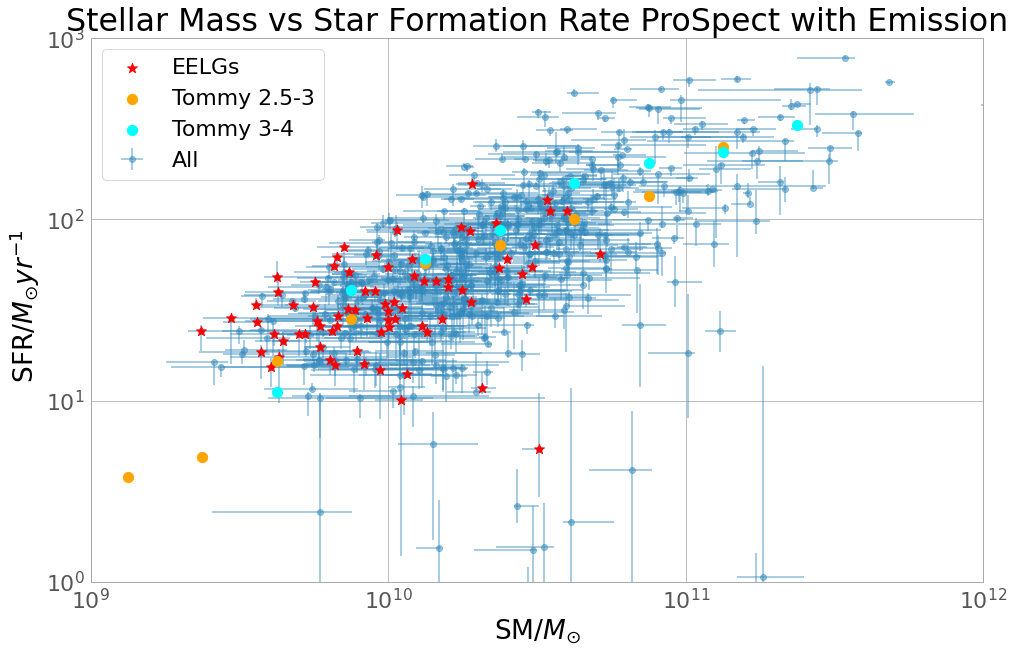

In [92]:
# plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter((ProEELG['StellarMass']),ProEELG['mSFR'])
plt.scatter(ProEELG['StellarMass'],ProEELG['SFRburst'], c='r', marker='*', s=105, zorder =2, label='EELGs')
# plt.errorbar(SAMPLE_em['StellarMass'],SAMPLE_em['mSFR']
#              ,xerr=(SAMPLE_em['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
#              ,yerr=(SAMPLE_em['mSFR']-SAMPLE_em['mSFR_LB'],SAMPLE_em['mSFR_UB']-SAMPLE_em['mSFR']),fmt='o', alpha=0.5, zorder=1, label='All')

plt.errorbar(SAMPLE_em['StellarMass'],SAMPLE_em['SFRburst']
             ,xerr=(SAMPLE_em['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
             ,yerr=(SAMPLE_em['SFRburst']-SAMPLE_em['SFRburst_LB'],SAMPLE_em['SFRburst_UB']-SAMPLE_em['SFRburst']),fmt='o', alpha=0.5, zorder=1, label='All')
plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
            (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
            (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')

plt.ylabel(' SFR/$M_{\odot}yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1,1000)
ax.set_xlim(10**9,10**12)
    

plt.title('Stellar Mass vs Star Formation Rate ProSpect with Emission')

Text(0.5, 1.0, 'Stellar Mass vs Star Formation Rate ProSpect')

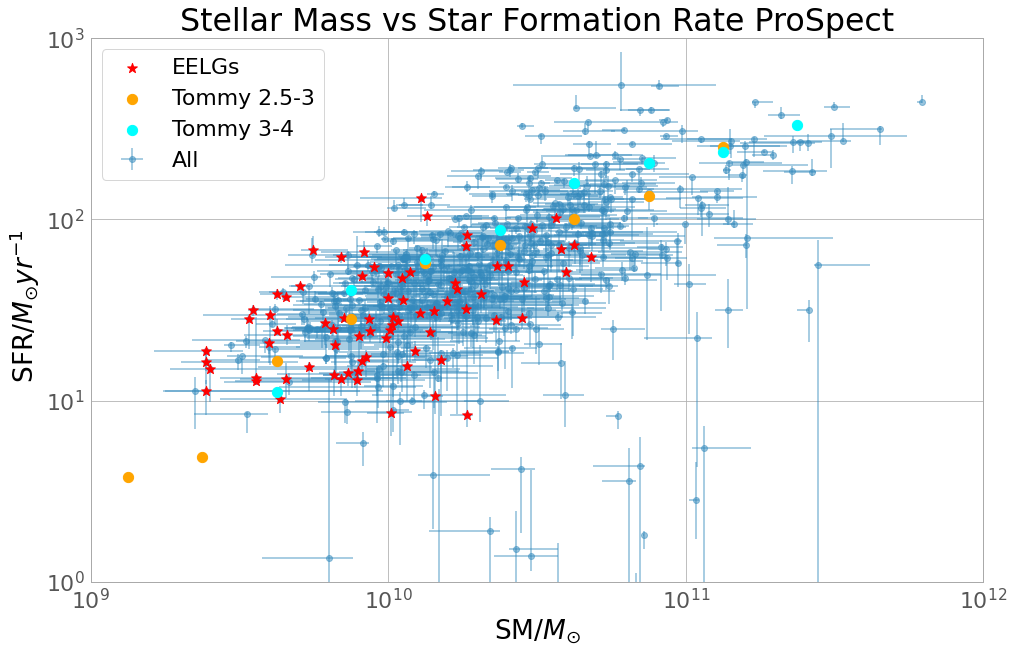

In [93]:
# plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter((ProEELG['StellarMass']),ProEELG['mSFR'])
plt.scatter(ProEELG_noem['StellarMass'],ProEELG_noem['SFRburst'], c='r', marker='*', s=105, zorder =2, label='EELGs')
# plt.errorbar(SAMPLE_em['StellarMass'],SAMPLE_em['mSFR']
#              ,xerr=(SAMPLE_em['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
#              ,yerr=(SAMPLE_em['mSFR']-SAMPLE_em['mSFR_LB'],SAMPLE_em['mSFR_UB']-SAMPLE_em['mSFR']),fmt='o', alpha=0.5, zorder=1, label='All')

plt.errorbar(SAMPLE_noem['StellarMass'],SAMPLE_noem['SFRburst']
             ,xerr=(SAMPLE_noem['StellarMass']-SAMPLE_noem['StellarMass_LB'],SAMPLE_noem['StellarMass_UB']-SAMPLE_noem['StellarMass'])
             ,yerr=(SAMPLE_noem['SFRburst']-SAMPLE_noem['SFRburst_LB'],SAMPLE_noem['SFRburst_UB']-SAMPLE_noem['SFRburst']),fmt='o', alpha=0.5, zorder=1, label='All')
plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
            (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
            (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')

plt.ylabel(' SFR/$M_{\odot}yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1,1000)
ax.set_xlim(10**9,10**12)
    

plt.title('Stellar Mass vs Star Formation Rate ProSpect')

Text(0.5, 1.0, 'Stellar Mass vs Specific Star Formation Rate ProSpect')

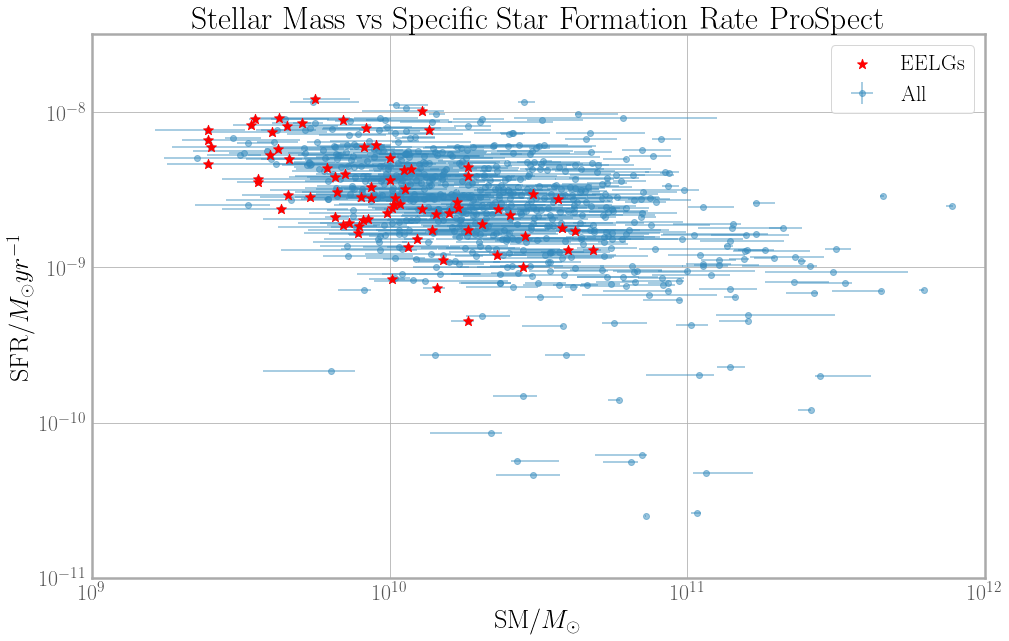

In [139]:
# plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter((ProEELG['StellarMass']),ProEELG['mSFR'])
plt.scatter(ProEELG_noem['StellarMass'],ProEELG_noem['SFRburst']/ProEELG_noem['StellarMass'], c='r', marker='*', s=105, zorder =2, label='EELGs')
# plt.errorbar(SAMPLE_em['StellarMass'],SAMPLE_em['mSFR']
#              ,xerr=(SAMPLE_em['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
#              ,yerr=(SAMPLE_em['mSFR']-SAMPLE_em['mSFR_LB'],SAMPLE_em['mSFR_UB']-SAMPLE_em['mSFR']),fmt='o', alpha=0.5, zorder=1, label='All')

plt.errorbar(SAMPLE_noem['StellarMass'],SAMPLE_noem['SFRburst']/SAMPLE_noem['StellarMass']
             ,xerr=(SAMPLE_noem['StellarMass']-SAMPLE_noem['StellarMass_LB'],
                    SAMPLE_noem['StellarMass_UB']-SAMPLE_noem['StellarMass'])
             ,yerr=(SAMPLE_noem['SFRburst']/SAMPLE_noem['StellarMass']-(SAMPLE_noem['SFRburst_LB']+SAMPLE_noem['StellarMass_LB']),
                    (SAMPLE_noem['SFRburst_UB']+SAMPLE_noem['StellarMass_UB'])-SAMPLE_noem['SFRburst']/SAMPLE_noem['StellarMass']),
             fmt='o', alpha=0.5, zorder=1, label='All')
# plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
#             (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
# plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
#             (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')

plt.ylabel(' SFR/$M_{\odot}yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(10**-11,10**-7.5)
ax.set_xlim(10**9,10**12)
    

plt.title('Stellar Mass vs Specific Star Formation Rate ProSpect')

Text(0.5, 1.0, 'ProSpect Stellar Mass')

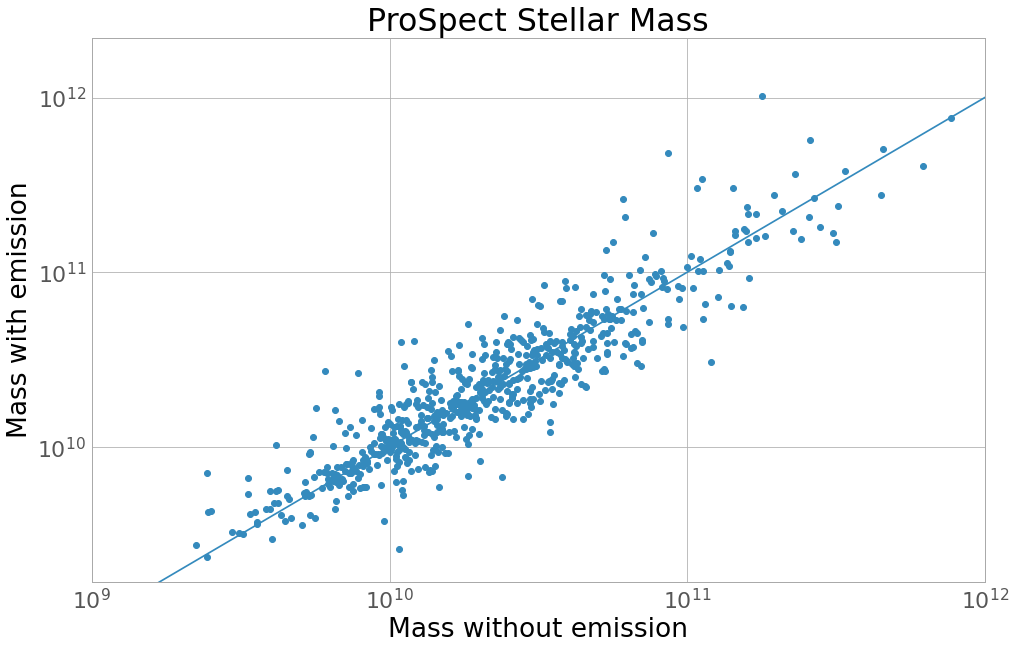

In [94]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(SAMPLE_noem['StellarMass'],SAMPLE_em['StellarMass'])
plt.plot(linspace(0,10**12,100),linspace(0,10**12,100))
plt.xlabel('Mass without emission')
plt.ylabel('Mass with emission')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**9,10**12)
plt.title('ProSpect Stellar Mass')

Text(0.5, 1.0, 'Stellar Mass vs Star Formation Rate MAGPHYS')

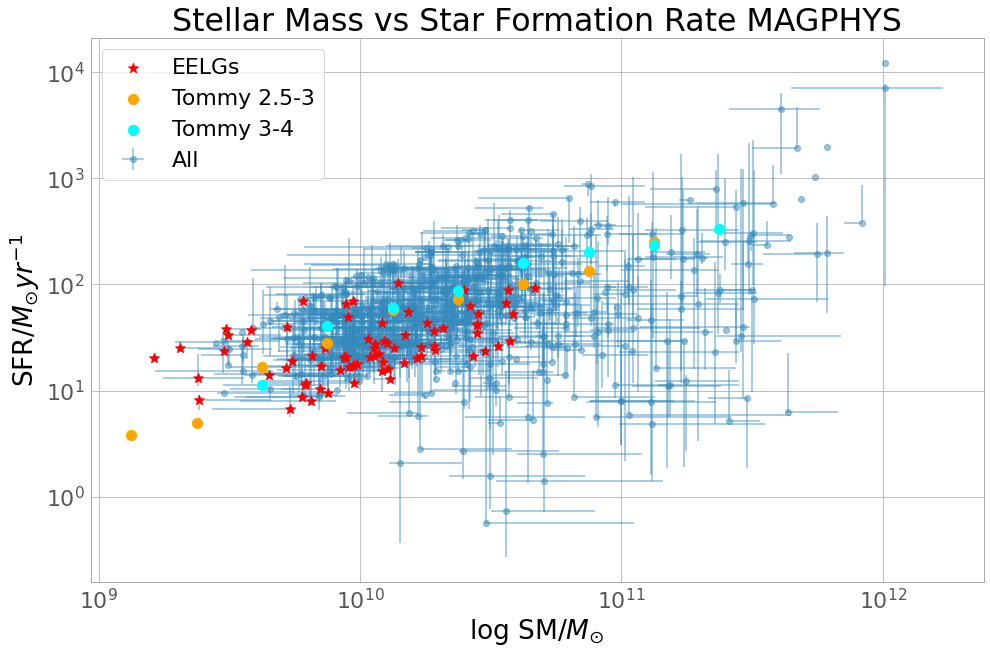

In [95]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.errorbar(SAMPLE_em['StellarMass'],SAMPLE_em['mSFR']
#              ,xerr=(SAMPLE_em['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
#              ,yerr=(SAMPLE_em['mSFR']-SAMPLE_em['mSFR_LB'],SAMPLE_em['mSFR_UB']-SAMPLE_em['mSFR']),fmt='o', alpha=0.5, zorder=1, label='All')

# plt.scatter(FINAL['M(stars)'],log10(FINAL[r'$SFR_{0.1Gyr}$']),label='All')
         #    ,xerr=(FINAL['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
            # ,yerr=(SAMPLE_em['mSFR']-SAMPLE_em['mSFR_LB'],SAMPLE_em['mSFR_UB']-SAMPLE_em['mSFR']),fmt='o', alpha=0.5, zorder=1, label='All')
plt.scatter(FINALEELG['M(stars)'],(FINALEELG[r'$SFR_{0.1Gyr}$']),c='r', marker='*', s=105, zorder =2, label='EELGs')

plt.errorbar(FINAL['M(stars)'],(FINAL[r'$SFR_{0.1Gyr}$'])
             ,xerr=(((FINAL['M(stars)'])-(FINAL_ers['SMl']))
                    ,((FINAL_ers['SMh'])-(FINAL['M(stars)'])))
             ,yerr=((FINAL[r'$SFR_{0.1Gyr}$'])-(FINAL_ers['SFRl'])
                    ,(FINAL_ers['SFRh'])-(FINAL[r'$SFR_{0.1Gyr}$']))
             ,fmt='o', alpha=0.5, zorder=1, label='All')
plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
            (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
            (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')


plt.ylabel('SFR/$M_{\odot}yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('log SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(-2,5)
plt.title('Stellar Mass vs Star Formation Rate MAGPHYS')

Text(0.5, 1.0, 'Stellar Mass vs Star Formation Rate MAGPHYS')

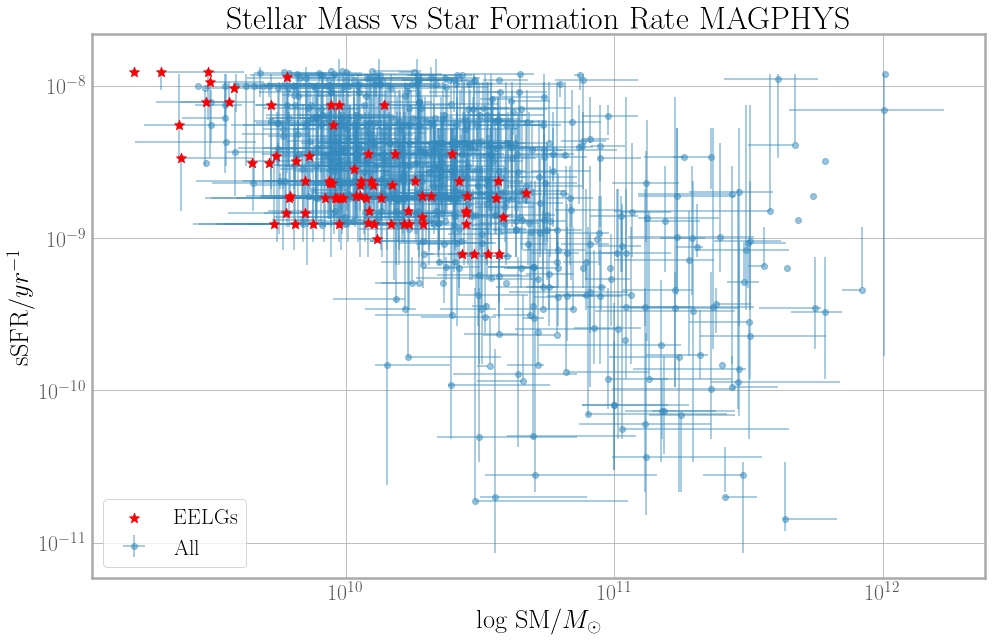

In [134]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.errorbar(SAMPLE_em['StellarMass'],SAMPLE_em['mSFR']
#              ,xerr=(SAMPLE_em['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
#              ,yerr=(SAMPLE_em['mSFR']-SAMPLE_em['mSFR_LB'],SAMPLE_em['mSFR_UB']-SAMPLE_em['mSFR']),fmt='o', alpha=0.5, zorder=1, label='All')

# plt.scatter(FINAL['M(stars)'],log10(FINAL[r'$SFR_{0.1Gyr}$']),label='All')
         #    ,xerr=(FINAL['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
            # ,yerr=(SAMPLE_em['mSFR']-SAMPLE_em['mSFR_LB'],SAMPLE_em['mSFR_UB']-SAMPLE_em['mSFR']),fmt='o', alpha=0.5, zorder=1, label='All')
plt.scatter(FINALEELG['M(stars)'],(FINALEELG[r'sSFR$_{0.1Gyr}$']),c='r', marker='*', s=105, zorder =2, label='EELGs')

plt.errorbar(FINAL['M(stars)'],(FINAL[r'sSFR$_{0.1Gyr}$'])
             ,xerr=(((FINAL['M(stars)'])-(FINAL_ers['SMl']))
                    ,((FINAL_ers['SMh'])-(FINAL['M(stars)'])))
             ,yerr=((FINAL[r'sSFR$_{0.1Gyr}$'])-(FINAL_ers['sSFRl'])
                    ,(FINAL_ers['sSFRh'])-(FINAL[r'sSFR$_{0.1Gyr}$']))
             ,fmt='o', alpha=0.5, zorder=1, label='All')
# plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
#             (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
# plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
#             (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')


plt.ylabel('sSFR/$yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('log SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(-2,5)
plt.title('Stellar Mass vs Star Formation Rate MAGPHYS')

Text(0.5, 1.0, 'ProSpect/Magphys Stellar Mass')

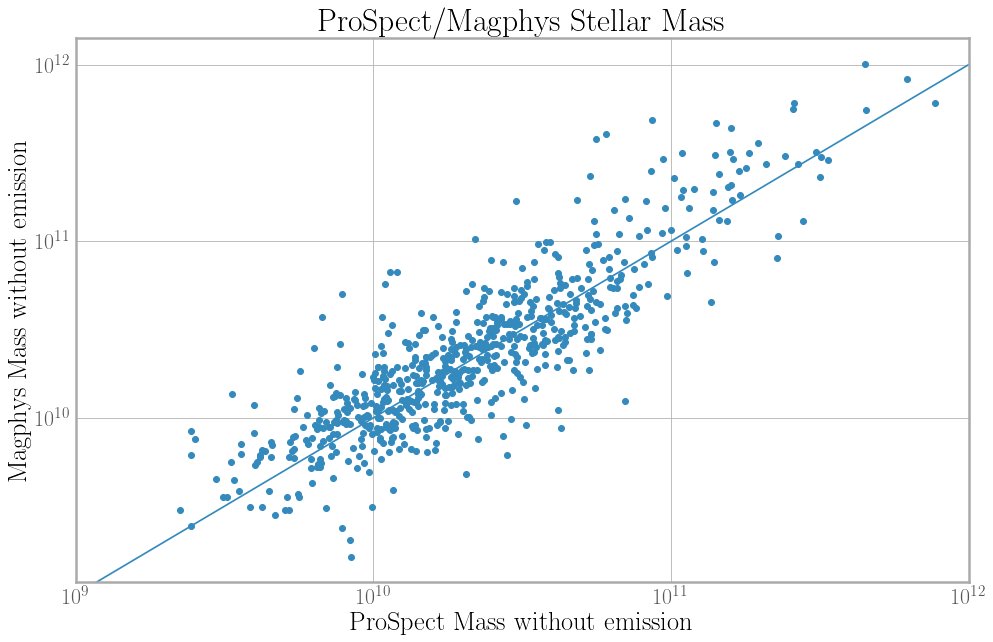

In [132]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(SAMPLE_noem['StellarMass'],FINAL['M(stars)'])
plt.plot(linspace(0,10**12,100),linspace(0,10**12,100))
plt.xlabel('ProSpect Mass without emission')
plt.ylabel('Magphys Mass without emission')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**9,10**12)
plt.title('ProSpect/Magphys Stellar Mass')

(1, 3000)

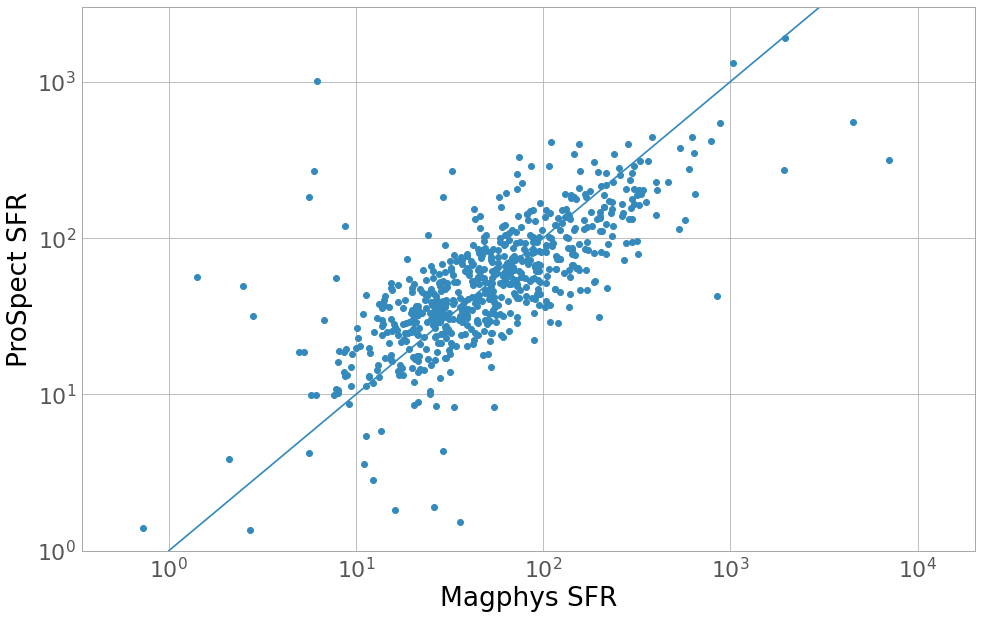

In [114]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter((FINAL[r'$SFR_{0.1Gyr}$']),(SAMPLE_noem['SFRburst']))
plt.xlabel('Magphys SFR')
plt.ylabel('ProSpect SFR')
plt.plot(linspace(1,3500,10),linspace(1,3500,10))

ax.set_xscale('log')
ax.set_yscale('log')
plt.ylim(1,3000)

In [116]:
def HexPlot(xlab1='',ylab1='',xlab2='',ylab2='',xlab3='',ylab3='',\
           wspace=0.25,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=7,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig,axarr =plt.subplots(1,3,figsize=(size_x,size_y))
    gs=gridspec.GridSpec(1,3)
    gs.update(wspace=wspace)
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    ax3=plt.subplot(gs[2])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax3.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax3.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    ax3.set_xlabel(xlab3,fontsize=lfs)
    ax3.set_ylabel(ylab3,fontsize=lfs)
    return fig,ax1,ax2,ax3

In [123]:
SAM_z = SAMPLE_em['z']
Pro_z = ProEELG['z']
SAM_SM = SAMPLE_em['StellarMass']
Pro_SM = ProEELG['StellarMass']
SAM_SFR = log10(SAMPLE_em['SFRburst'])
Pro_SFR = log10(ProEELG['SFRburst'])
SAM_dlum = SAMPLE_em['dustlum.total']
Pro_dlum = ProEELG['dustlum.total']
SAM_dmas = SAMPLE_em['dustmass.total']
Pro_dmas = ProEELG['dustmass.total']

/tmp/ipykernel_16351/1110885094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colour[i] =nan
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


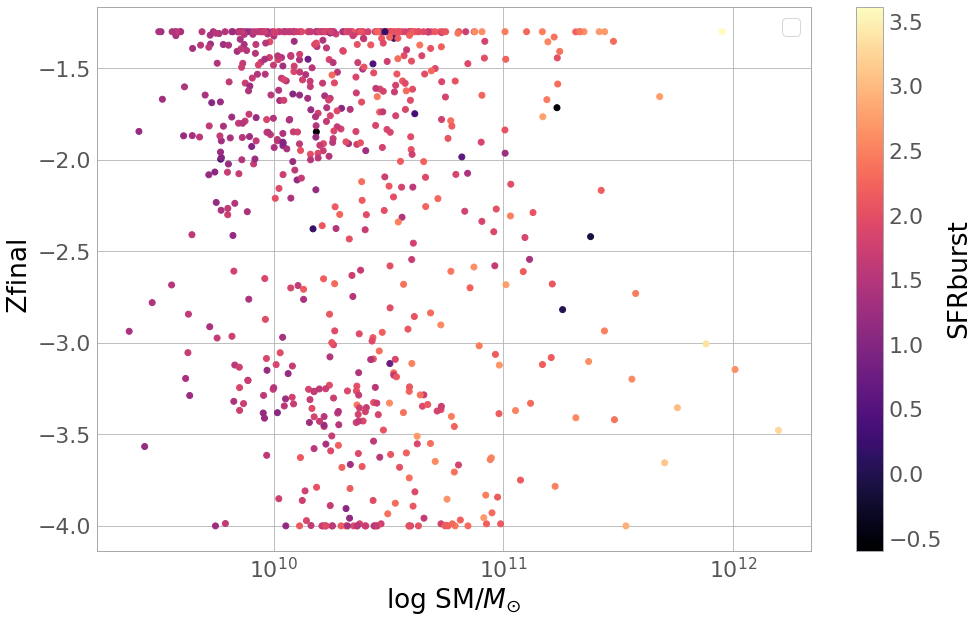

In [118]:
import matplotlib.cm as cm
colour=SAMPLE_em['SFRburst']
for i in range(len(colour)):
    if colour[i] < 1*10**-4:
        colour[i] =nan
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))

sc = plt.scatter(SAM_SM,SAMPLE_em['Zfinal'],c=log10(colour),cmap=cm.magma)
plt.colorbar(sc,label='SFRburst')#,aspect=8,fraction=0.04)

plt.ylabel(' Zfinal')#log star formation rate/ M_star/yr
plt.xlabel('log SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')


/tmp/ipykernel_16351/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_16351/4146921367.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


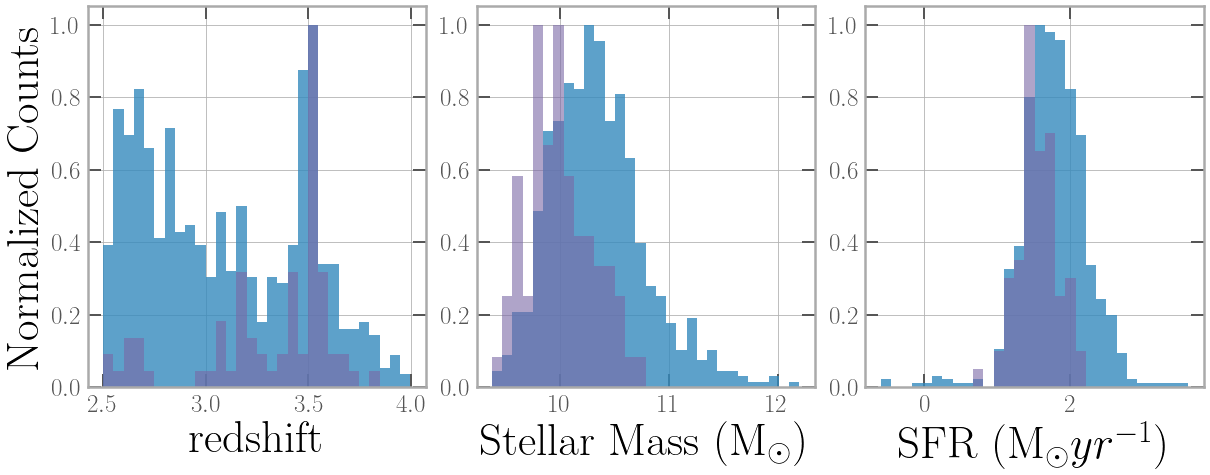

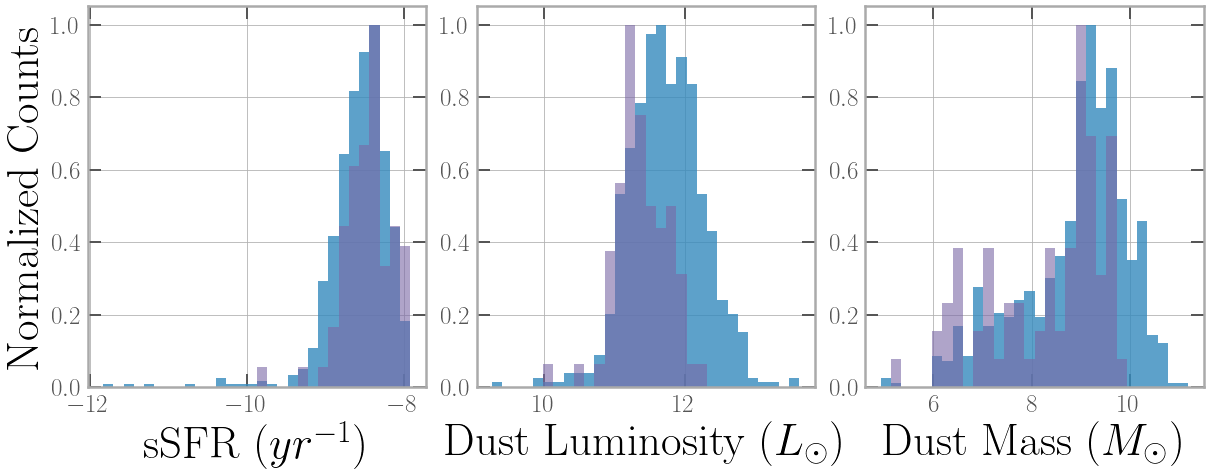

In [124]:
#PROSPECT- with emission lines
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(2.5,max(SAM_z),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(SAM_z, bins=bin_lims)
hist2, _ = np.histogram(Pro_z, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(min(log10(SAM_SM)),max(log10(SAM_SM)),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(log10(SAM_SM), bins=bin_limsSM)
hist2SM, _ = np.histogram(log10(Pro_SM), bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(min(SAM_SFR),max(SAM_SFR),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SAM_SFR, bins=bin_limsSFR)
hist2SFR, _ = np.histogram(Pro_SFR, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(log10(10**SAM_SFR/(SAM_SM))),max(log10(10**SAM_SFR/(SAM_SM))),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(log10(10**SAM_SFR/(SAM_SM)), bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(log10(10**Pro_SFR/(Pro_SM)), bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(min(log10(SAM_dlum)),max(log10(SAM_dlum)),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(log10(SAM_dlum), bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(log10(Pro_dlum), bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(min(log10(SAM_dmas)),max(log10(SAM_dmas)),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(log10(SAM_dmas), bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(log10(Pro_dmas), bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

# ##computing the bin properties (same for both distributions) Dust Attenuation
# num_bintauISM = 30
# bin_limstauISM = np.linspace(0,max(tauISMh)/4,num_bintauISM+1)
# bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
# bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

# ##computing the histograms
# hist1tauISM, _ = np.histogram(tauISMh, bins=bin_limstauISM)
# hist2tauISM, _ = np.histogram(tauISM, bins=bin_limstauISM)

# ##normalizing
# hist1btauISM = hist1tauISM/np.max(hist1tauISM)
# hist2btauISM = hist2tauISM/np.max(hist2tauISM)

# ##computing the bin properties (same for both distributions) chi2
# num_binchi2 = 30
# bin_limschi2 = np.linspace(0,max(chi2h)/4,num_binchi2+1)
# bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
# bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

# ##computing the histograms
# hist1chi2, _ = np.histogram(chi2h, bins=bin_limschi2)
# hist2chi2, _ = np.histogram(chi2, bins=bin_limschi2)

# ##normalizing
# hist1bchi2 = hist1chi2/np.max(hist1chi2)
# hist2bchi2 = hist2chi2/np.max(hist2chi2)

# ##computing the bin properties (same for both distributions) ISM Temperature
# num_binT_CISM = 30
# bin_limsT_CISM = np.linspace(0,max(T_CISMh),num_binT_CISM+1)
# bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
# bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

# ##computing the histograms
# hist1T_CISM, _ = np.histogram(T_CISMh, bins=bin_limsT_CISM)
# hist2T_CISM, _ = np.histogram(T_CISM, bins=bin_limsT_CISM)

# ##normalizing
# hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
# hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
# plt.savefig('NormPotato1',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
# # plt.savefig('NormPotato2',bbox_inches='tight')
# # plt.savefig('NormPotato2')
# ###############################################
# fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

# ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
# ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
# ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
# ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
# ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8)
# ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6)
# plt.tight_layout()
# plt.savefig('NormPotato3',bbox_inches='tight')
plt.show()

In [130]:
SAMPLE_noem[SAMPLE_noem['SFRburst']==min(SAMPLE_noem['SFRburst'])]
# min(SAMPLE_noem['SFRburst'])

,id,z,mSFR,mpeak,mperiod,mskew,tau_birth,tau_screen,alpha_SF_birth,alpha_SF_screen,Zfinal,LP,masstot,dustmass.birth,dustmass.screen,dustmass.total,dustlum.birth,dustlum.screen,dustlum.total,SFRburst,StellarMass,mSFR_LB,mpeak_LB,mperiod_LB,mskew_LB,tau_birth_LB,tau_screen_LB,alpha_SF_birth_LB,alpha_SF_screen_LB,Zfinal_LB,LP_LB,masstot_LB,dustmass.birth_LB,dustmass.screen_LB,dustmass.total_LB,dustlum.birth_LB,dustlum.screen_LB,dustlum.total_LB,SFRburst_LB,StellarMass_LB,mSFR_UB,mpeak_UB,mperiod_UB,mskew_UB,tau_birth_UB,tau_screen_UB,alpha_SF_birth_UB,alpha_SF_screen_UB,Zfinal_UB,LP_UB,masstot_UB,dustmass.birth_UB,dustmass.screen_UB,dustmass.total_UB,dustlum.birth_UB,dustlum.screen_UB,dustlum.total_UB,SFRburst_UB,StellarMass_UB
518,26508,3.88203,2.927354,1.941533,-0.964436,-0.358311,0.423216,-0.454191,3.722335,4.0,-3.99577,-45.034792,2.964842e+11,0.0,1.243785e+09,1.243785e+09,0.0,1.051171e+11,1.051171e+11,0.0,5.175978e-72,2.577643,1.484125,-1.0,-0.5,-1.109644,-1.312201,0.952829,0.0,-4.0,-49.182995,1.979089e+11,0.0,112922.692649,112922.692649,0.0,1.237974e+10,1.237974e+10,0.0,3.455064e-72,2.927354,2.522611,-0.856107,-0.335961,1.5,-0.410899,4.0,4.0,-2.91926,-45.034792,3.419858e+11,0.0,1.485102e+09,1.485102e+09,0.0,1.290680e+11,1.290680e+11,0.0,5.970338e-72


In [125]:
SAM_zn = SAMPLE_noem['z']
Pro_zn = ProEELG_noem['z']
SAM_SMn = SAMPLE_noem['StellarMass']
Pro_SMn = ProEELG_noem['StellarMass']
SAM_SFRn = log10(SAMPLE_noem['SFRburst'])
Pro_SFRn = log10(ProEELG_noem['SFRburst'])
SAM_dlumn = SAMPLE_noem['dustlum.total']
Pro_dlumn = ProEELG_noem['dustlum.total']
SAM_dmasn = SAMPLE_noem['dustmass.total']
Pro_dmasn = ProEELG_noem['dustmass.total']

/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/tmp/ipykernel_16351/3226181544.py:41: RuntimeWarning: invalid value encountered in true_divide
  hist1bSFR = hist1SFR/np.max(hist1SFR)
/tmp/ipykernel_16351/3226181544.py:42: RuntimeWarning: invalid value encountered in true_divide
  hist2bSFR = hist2SFR/np.max(hist2SFR)
/tmp/ipykernel_16351/3226181544.py:55: RuntimeWarning: invalid value encountered in true_divide
  hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
/tmp/ipykernel_16351/3226181544.py:56: RuntimeWarning: invalid value encountered in true_divide
  hist2bsSFR = hist2sSFR/np.max(hist2sSFR)
/tmp/ipykernel_16351/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipy

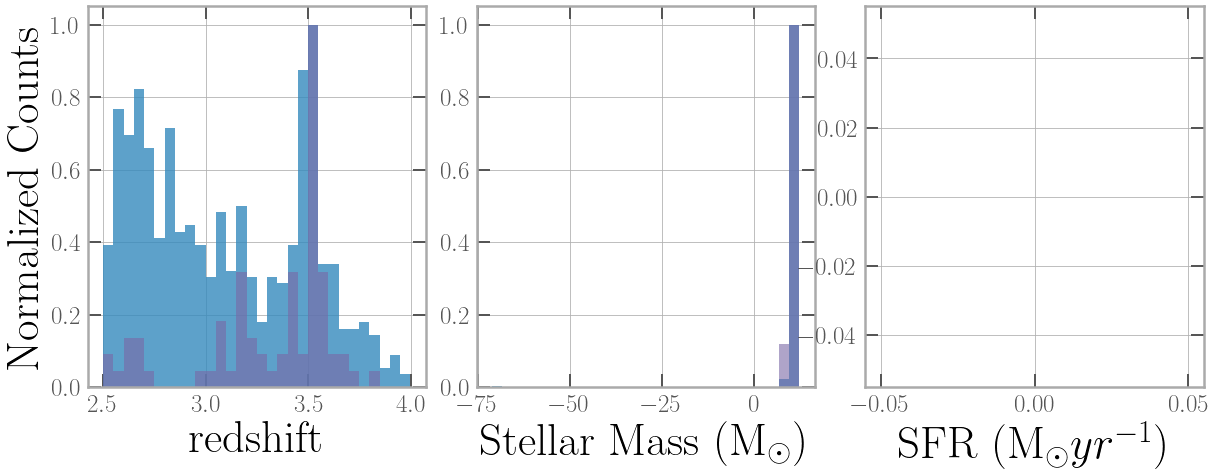

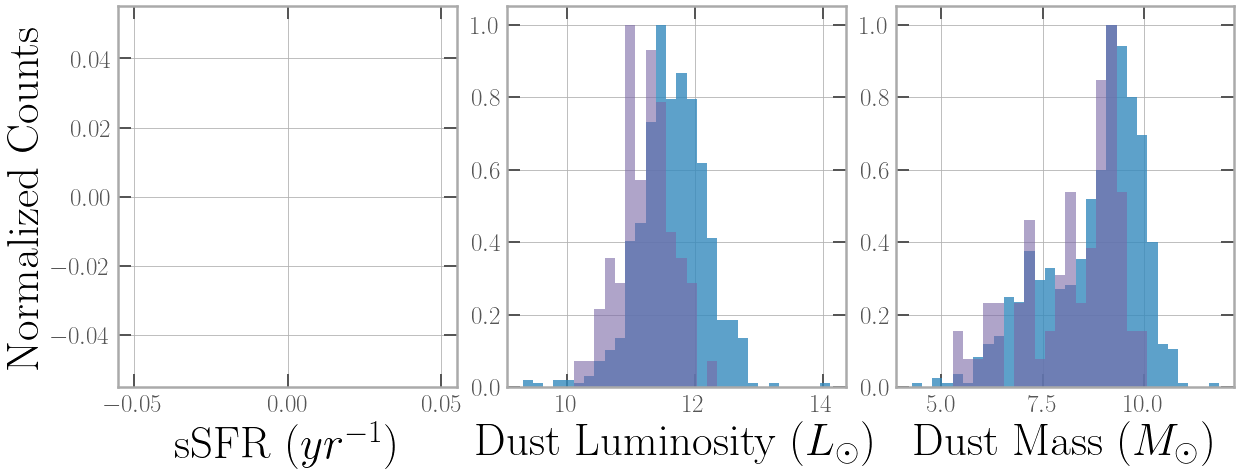

In [126]:
#PROSPECT- withOUT emission lines
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(2.5,max(SAM_zn),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(SAM_zn, bins=bin_lims)
hist2, _ = np.histogram(Pro_zn, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(min(log10(SAM_SMn)),max(log10(SAM_SMn)),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(log10(SAM_SMn), bins=bin_limsSM)
hist2SM, _ = np.histogram(log10(Pro_SMn), bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(min(SAM_SFRn),max(SAM_SFRn),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SAM_SFRn, bins=bin_limsSFR)
hist2SFR, _ = np.histogram(Pro_SFRn, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(log10(10**SAM_SFRn/(SAM_SMn))),max(log10(10**SAM_SFRn/(SAM_SMn))),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(log10(10**SAM_SFRn/(SAM_SMn)), bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(log10(10**Pro_SFRn/(Pro_SMn)), bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(min(log10(SAM_dlumn)),max(log10(SAM_dlumn)),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(log10(SAM_dlumn), bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(log10(Pro_dlumn), bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(min(log10(SAM_dmasn)),max(log10(SAM_dmasn)),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(log10(SAM_dmasn), bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(log10(Pro_dmasn), bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

# ##computing the bin properties (same for both distributions) Dust Attenuation
# num_bintauISM = 30
# bin_limstauISM = np.linspace(0,max(tauISMh)/4,num_bintauISM+1)
# bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
# bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

# ##computing the histograms
# hist1tauISM, _ = np.histogram(tauISMh, bins=bin_limstauISM)
# hist2tauISM, _ = np.histogram(tauISM, bins=bin_limstauISM)

# ##normalizing
# hist1btauISM = hist1tauISM/np.max(hist1tauISM)
# hist2btauISM = hist2tauISM/np.max(hist2tauISM)

# ##computing the bin properties (same for both distributions) chi2
# num_binchi2 = 30
# bin_limschi2 = np.linspace(0,max(chi2h)/4,num_binchi2+1)
# bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
# bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

# ##computing the histograms
# hist1chi2, _ = np.histogram(chi2h, bins=bin_limschi2)
# hist2chi2, _ = np.histogram(chi2, bins=bin_limschi2)

# ##normalizing
# hist1bchi2 = hist1chi2/np.max(hist1chi2)
# hist2bchi2 = hist2chi2/np.max(hist2chi2)

# ##computing the bin properties (same for both distributions) ISM Temperature
# num_binT_CISM = 30
# bin_limsT_CISM = np.linspace(0,max(T_CISMh),num_binT_CISM+1)
# bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
# bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

# ##computing the histograms
# hist1T_CISM, _ = np.histogram(T_CISMh, bins=bin_limsT_CISM)
# hist2T_CISM, _ = np.histogram(T_CISM, bins=bin_limsT_CISM)

# ##normalizing
# hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
# hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
# plt.savefig('NormPotato1',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
# # plt.savefig('NormPotato2',bbox_inches='tight')
# # plt.savefig('NormPotato2')
# ###############################################
# fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

# ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
# ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
# ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
# ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
# ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8)
# ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6)
# plt.tight_layout()
# plt.savefig('NormPotato3',bbox_inches='tight')
plt.show()

In [117]:
#highz EELG vs full sample histograms
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshifth),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshifth, bins=bin_lims)
hist2, _ = np.histogram(redshift, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SMh),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SMh, bins=bin_limsSM)
hist2SM, _ = np.histogram(SM, bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFRh),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFRh, bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFR, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFRh),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFRh, bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFR, bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldusth),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldusth, bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldust, bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdusth),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdusth, bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdust, bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISMh)/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISMh, bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISM, bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2h)/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2h, bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2, bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISMh),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISMh, bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISM, bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
# plt.savefig('NormPotato1',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
# plt.savefig('NormPotato2',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8)
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6)
plt.tight_layout()
# plt.savefig('NormPotato3',bbox_inches='tight')
plt.show()

NameError: name 'redshifth' is not defined

In [22]:
# # x,bins,p=plt.hist([redshifth,redshift], bins=20, density=True, histtype='bar')#, stacked=True)
# x, bins, p=plt.hist([redshifth,redshift], density=True)
# # plt.bar(x, y2 ,bottom=y1,label='y2')
# # for item in p:
# #     item.set_height(item.get_height()/sum(x))
# plt.title('redshifts')
# plt.show()
# # plt.hist([SMh,SM], bins=20, density=True, histtype='bar', stacked=True)
# x, bins, p=plt.hist([SMh,SM], density=True)
# plt.title('M(stars)')
# plt.show()
# # plt.hist([SFRh,SFR], bins=20, density=True, histtype='bar', stacked=True)
# x, bins, p=plt.hist([SFRh,SFR], density=True)
# plt.title('SFR')
# plt.show()
# # plt.hist([Ldusth,Ldust], bins=20, density=True, histtype='bar', stacked=True)
# x, bins, p=plt.hist([Ldusth,Ldust], density=True)
# plt.title('Ldust')
# plt.show()
# plt.hist([sSFRh,sSFR], bins=20, density=True, histtype='bar', stacked=True)
# x, bins, p=plt.hist([sSFRh,sSFR], density=True)
# plt.title('sSFR')
# plt.show()
# # plt.hist([Mdusth,Mdust], bins=20, density=True, histtype='bar', stacked=True)
# x, bins, p=plt.hist([Mdusth,Mdust], density=True)
# plt.title('Mdust')
# plt.show()

In [32]:
#import full Strong emission line contaminated filters removed set(SEL) 
path = os.path.expanduser('~/notebook/Chestnuts/')
SEL=pd.read_csv(os.path.expanduser(path+'StrongEL.csv'),index_col=0)
SEL

,Galaxy_ID,redshift,SFH $f_{mu}$,IR $f_{mu}$,$\mu$,$\tau_V$,sSFR$_{0.1Gyr}$,M(stars),Ldust,$T_C^{ISM}$,...,$\chi_{W}^{tot}$,$\tau_{V}^{ISM}$,M(dust),$SFR_{0.1Gyr}$,$A_V$,$age_M$,Tdust,lg(M/Lh),lg(M/Lk),chi2
0,1,0.61654,0.897,0.984,0.429,11.636,1.853000e-11,3.852000e+12,4.509000e+12,62.5,...,0.014,4.997,432300000.0,71.3700,5.404,9.584,36.260,1.195,1.228,259.813
1,2,0.43408,0.868,0.984,0.440,7.292,1.423000e-11,5.401000e+10,3.867000e+10,62.5,...,0.014,3.211,3707000.0,0.7684,3.491,9.857,36.260,0.987,1.074,299.269
2,3,0.95420,0.343,0.385,0.325,2.976,9.958000e-11,1.731000e+11,4.124000e+11,60.2,...,0.285,0.967,117400000.0,17.2300,1.261,9.659,42.334,0.382,0.550,88.400
3,4,3.81199,0.111,0.015,0.583,0.104,1.008000e-08,9.552000e+09,4.837000e+11,63.3,...,0.637,0.061,4328000.0,96.2800,0.093,7.791,62.863,-0.986,-0.791,372.905
4,5,4.86526,0.111,0.015,0.583,0.104,1.008000e-08,1.371000e+10,6.942000e+11,63.3,...,0.637,0.061,6212000.0,138.2000,0.093,7.791,62.863,-0.986,-0.791,273.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,30906,0.68055,0.161,0.290,0.195,6.197,1.103000e-08,2.468000e+08,8.240000e+10,32.8,...,0.640,1.209,30690000.0,2.7220,2.605,7.338,32.272,-0.730,-0.610,61.709
4091,30907,2.44406,0.090,0.015,0.279,0.120,3.269000e-09,1.496000e+10,1.414000e+11,63.3,...,0.637,0.034,1265000.0,48.9200,0.060,8.410,62.863,-0.551,-0.358,12.119
4092,30908,1.07964,0.332,0.306,0.304,11.246,3.960000e-10,3.446000e+11,3.444000e+12,69.9,...,0.568,3.424,188200000.0,136.4000,4.140,9.602,56.697,0.848,0.947,55.924
4093,30910,2.33941,0.124,0.015,0.228,1.524,6.002000e-09,2.846000e+09,3.561000e+11,63.3,...,0.637,0.347,3186000.0,17.0800,0.976,8.861,62.863,-0.792,-0.630,2.662


In [33]:
#Separating the EELGs from the total SEL using galaxy ids
path = os.path.expanduser('~/notebook/Chestnuts/')
EELG_IDs=pd.read_csv(os.path.expanduser(path+'Parameters76Highz.csv'))
EELGSEL = pd.merge(left=EELG_IDs['Galaxy_ID'],right=SEL, left_on='Galaxy_ID', right_on='Galaxy_ID')
# EELGSEL
EELGSEL.to_csv('EELG_SEL.csv')
EELG_SEL=Table.read(os.path.expanduser(path+'EELG_SEL.csv'))
EELG_SEL.remove_column('col0')

# EELG_SEL.round({'redshift':3})
EELG_SEL

Galaxy_ID,redshift,SFH $f_{mu}$,IR $f_{mu}$,$\mu$,$\tau_V$,sSFR$_{0.1Gyr}$,M(stars),Ldust,$T_C^{ISM}$,$T_W^{BC}$,$\chi_C^{tot}$,$\chi_{PAH}^{tot}$,$\chi_{MIR}^{tot}$,$\chi_{W}^{tot}$,$\tau_{V}^{ISM}$,M(dust),$SFR_{0.1Gyr}$,$A_V$,$age_M$,Tdust,lg(M/Lh),lg(M/Lk),chi2
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20366,3.53172,0.111,0.015,0.583,0.104,1.008e-08,602400000.0,30500000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.061,272900.0,6.071,0.093,7.791,62.863,-0.986,-0.791,3.265
11462,3.81006,0.111,0.015,0.583,0.104,1.008e-08,1839000000.0,93110000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.061,833200.0,18.53,0.093,7.791,62.863,-0.986,-0.791,15.552
12533,3.54599,0.136,0.015,0.495,0.024,3.226e-09,6539000000.0,14460000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.012,129300.0,21.1,0.016,8.456,62.863,-0.525,-0.322,22.478
12552,3.19594,0.083,0.015,0.18,0.025,3.117e-09,1614000000.0,4498000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.005,40250.0,5.031,0.008,8.461,62.863,-0.225,0.009,3.045
12903,3.09734,0.111,0.015,0.583,0.104,1.008e-08,524200000.0,26540000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.061,237500.0,5.284,0.093,7.791,62.863,-0.986,-0.791,4.56
14808,3.67329,0.111,0.015,0.583,0.104,1.008e-08,1365000000.0,69100000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.061,618300.0,13.75,0.093,7.791,62.863,-0.986,-0.791,7.545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16834,3.49973,0.136,0.015,0.495,0.024,3.226e-09,2290000000.0,5061000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.012,45290.0,7.387,0.016,8.456,62.863,-0.525,-0.322,2.403
22839,3.49055,0.066,0.015,0.199,0.015,1.876e-09,4066000000.0,3734000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.003,33410.0,7.626,0.006,8.705,62.863,-0.394,-0.182,4.178


In [34]:
#Definitions for EELG SEL data
SFR_ES = log10(EELG_SEL[r'$SFR_{0.1Gyr}$'])
SM_ES = log10(EELG_SEL['M(stars)'])
# SFRa = log10(mag2[r'$SFR_{0.1Gyr}$'])
# Parameters=[,r'$\tau_{V}^{ISM}$','M(dust)',r'$SFR_{0.1Gyr}$']
# SFH=magphys[r'SFH $f_{mu}$']
SFH_ES=EELG_SEL[r'SFH $f_{mu}$']
# IR=magphys[r'IR $f_{mu}$']
IR_ES=EELG_SEL[r'IR $f_{mu}$']
# mu=magphys[r'$\mu$']
mu_ES=EELG_SEL[r'$\mu$']
# tauv=magphys[r'$\tau_V$'] 
tauv_ES=EELG_SEL[r'$\tau_V$']
# sSFR=log10(magphys[r'sSFR$_{0.1Gyr}$'])
sSFR_ES=log10(EELG_SEL[r'sSFR$_{0.1Gyr}$'])
# Ldust=log10(magphys['Ldust'])
Ldust_ES=log10(EELG_SEL['Ldust'])
# T_CISM=magphys[r'$T_C^{ISM}$']
T_CISM_ES=EELG_SEL[r'$T_C^{ISM}$']
# T_WBC=magphys[r'$T_W^{BC}$']
T_WBC_ES=EELG_SEL[r'$T_W^{BC}$']
# chiC=magphys[r'$\chi_C^{tot}$']
chiC_ES=EELG_SEL[r'$\chi_C^{tot}$']
# chiPAH=magphys[r'$\chi_{PAH}^{tot}$']
chiPAH_ES=EELG_SEL[r'$\chi_{PAH}^{tot}$']
# chiMIR=magphys[r'$\chi_{MIR}^{tot}$']
chiMIR_ES=EELG_SEL[r'$\chi_{MIR}^{tot}$']
# chiW=magphys[r'$\chi_{W}^{tot}$']
chiW_ES=EELG_SEL[r'$\chi_{W}^{tot}$']
# tauISM=magphys[r'$\tau_{V}^{ISM}$']
tauISM_ES=EELG_SEL[r'$\tau_{V}^{ISM}$']
# Mdust=log10(magphys['M(dust)'])
Mdust_ES=log10(EELG_SEL['M(dust)'])
# redshift=magphys['redshift']
redshift_ES=EELG_SEL['redshift']

chi2_ES=EELG_SEL['chi2']

/tmp/ipykernel_10644/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_10644/2444240089.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_10644/2444240089.py:168: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


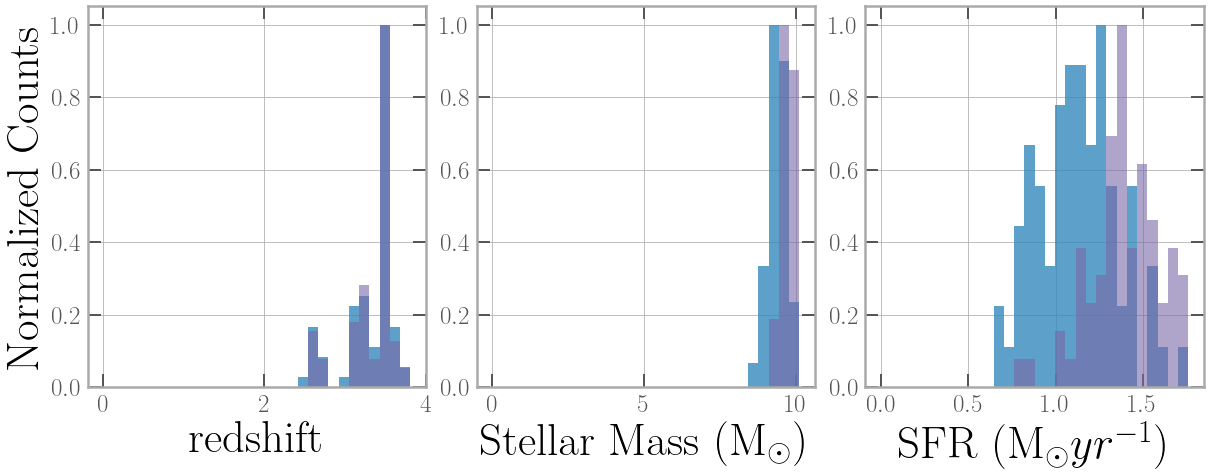

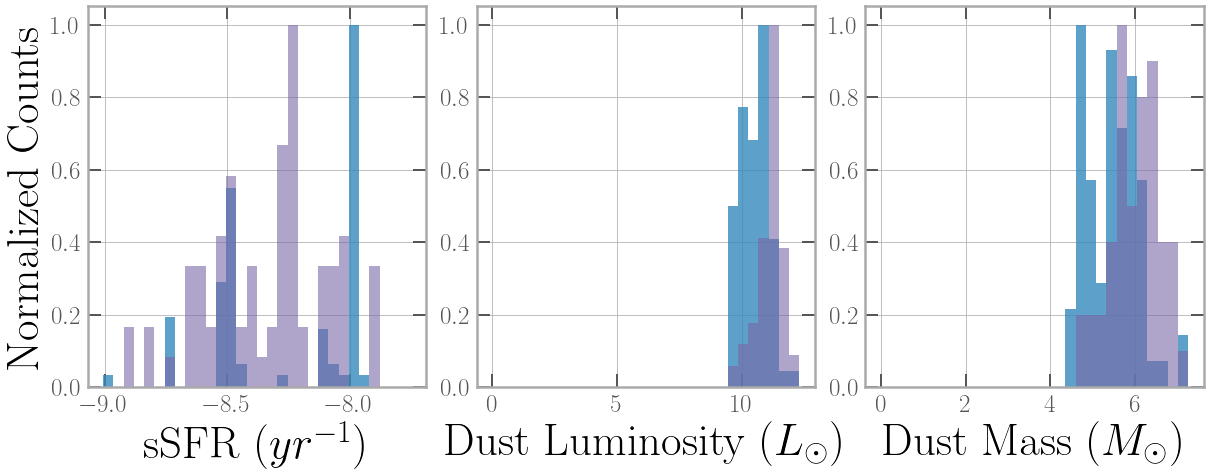

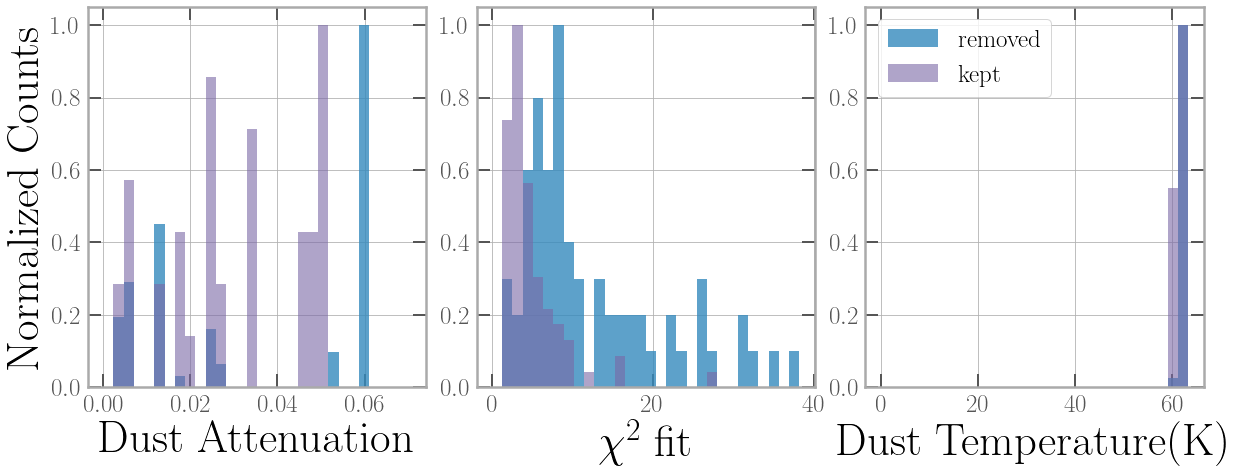

In [54]:
#histograms comparing EELGs for both SEL and non SEL sets
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshift_ES),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshift_ES, bins=bin_lims)
hist2, _ = np.histogram(redshift, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SM_ES),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SM_ES, bins=bin_limsSM)
hist2SM, _ = np.histogram(SM, bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFR_ES),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFR_ES, bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFR, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFR_ES),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFR_ES, bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFR, bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldust_ES),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldust_ES, bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldust, bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdust_ES),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdust_ES, bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdust, bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISM_ES)/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISM_ES, bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISM, bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2_ES)/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2_ES, bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2, bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISM_ES),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISM_ES, bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISM, bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
plt.savefig('NormPotato1_EELGSEL',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
plt.savefig('NormPotato2_EELGSEL',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8, label='removed')
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6,label='kept')
plt.tight_layout()
plt.legend()
plt.savefig('NormPotato3_EELGSEL',bbox_inches='tight')
plt.show()

In [36]:
#tests that show rounding issue between highz and EELG_SEL redshifts
# test = Table(EELG_SEL['redshift'])#, magphys['redshift'].any())
# test
# test2 = Table(magphys['redshift'])
# test2

In [38]:
#SEL full dataset definitions
SFRs = log10(SEL[r'$SFR_{0.1Gyr}$'])
SMs = log10(SEL['M(stars)'])

SFHs=SEL[r'SFH $f_{mu}$']
IRs=SEL[r'IR $f_{mu}$']
mus=SEL[r'$\mu$']
tauvs=SEL[r'$\tau_V$']
sSFRs=log10(SEL[r'sSFR$_{0.1Gyr}$'])
Ldusts=log10(SEL['Ldust'])
T_CISMs=SEL[r'$T_C^{ISM}$']
T_WBCs=SEL[r'$T_W^{BC}$']
chiCs=SEL[r'$\chi_C^{tot}$']
chiPAHs=SEL[r'$\chi_{PAH}^{tot}$']
chiMIRs=SEL[r'$\chi_{MIR}^{tot}$']
chiWs=SEL[r'$\chi_{W}^{tot}$']
tauISMs=SEL[r'$\tau_{V}^{ISM}$']
Mdusts=log10(SEL['M(dust)'])
redshifts=SEL['redshift']

chi2s=SEL['chi2']

/tmp/ipykernel_10644/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_10644/640330499.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_10644/640330499.py:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


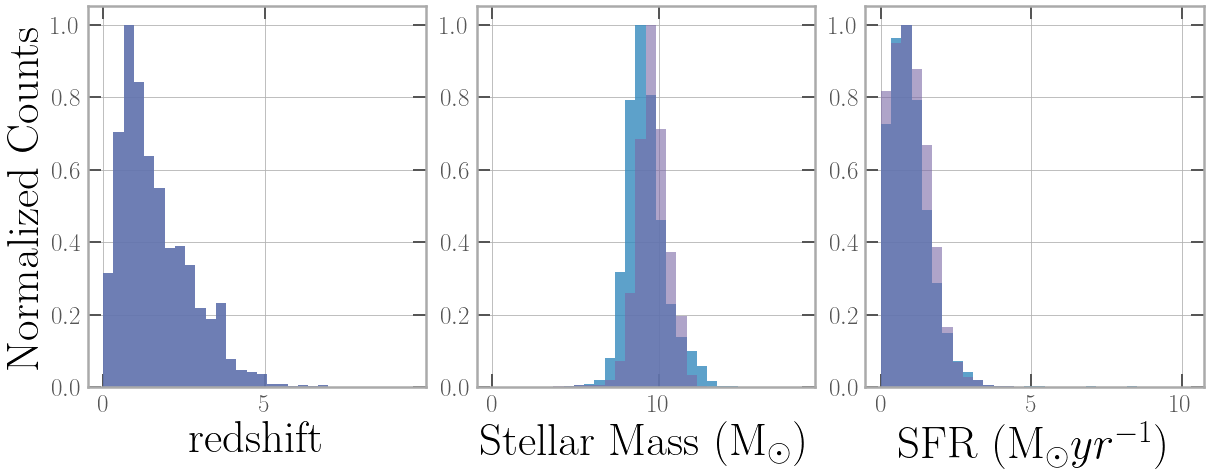

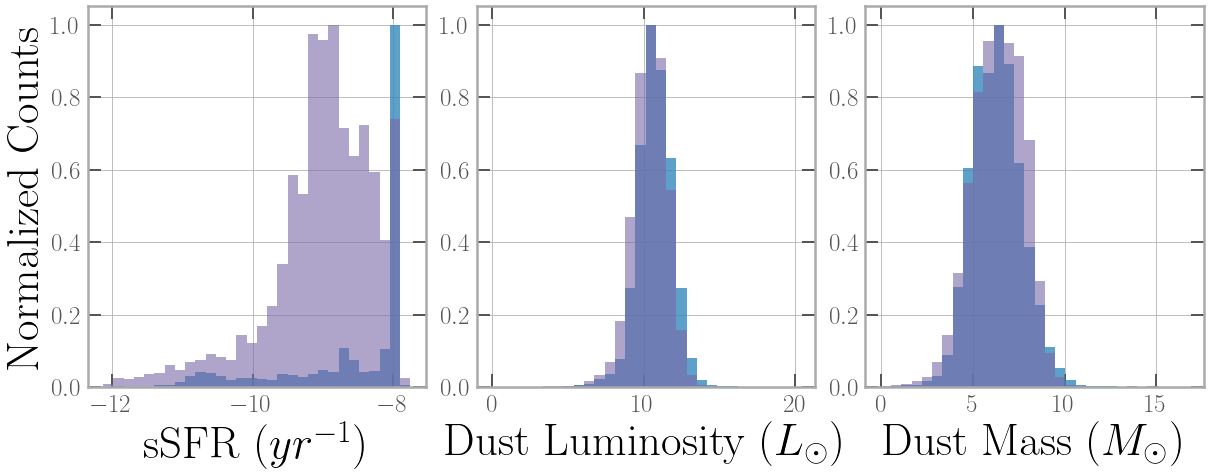

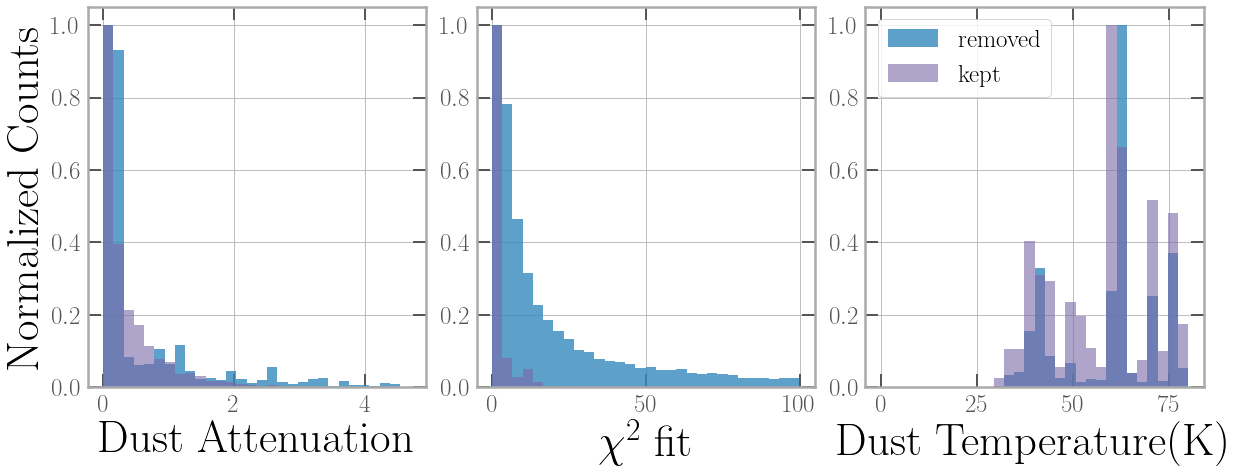

In [55]:
#histograms for SEL and non-SEL full datasets
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshifts),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshifts, bins=bin_lims)
hist2, _ = np.histogram(redshifth, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SMs),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SMs, bins=bin_limsSM)
hist2SM, _ = np.histogram(SMh, bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFRs),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFRs, bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFRh, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFRs),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFRs, bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFRh, bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldusts),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldusts, bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldusth, bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdusts),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdusts, bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdusth, bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISMs)/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISMs, bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISMh, bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2s)/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2s, bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2h, bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISMs),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISMs, bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISMh, bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
plt.savefig('NormPotato1-SEL',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
plt.savefig('NormPotato2-SEL',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8,label='removed')
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6,label='kept')
plt.legend()
plt.tight_layout()
plt.savefig('NormPotato3-SEL',bbox_inches='tight')
plt.show()
#Blue = SEL

/tmp/ipykernel_10644/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_10644/1457408666.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_10644/1457408666.py:171: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


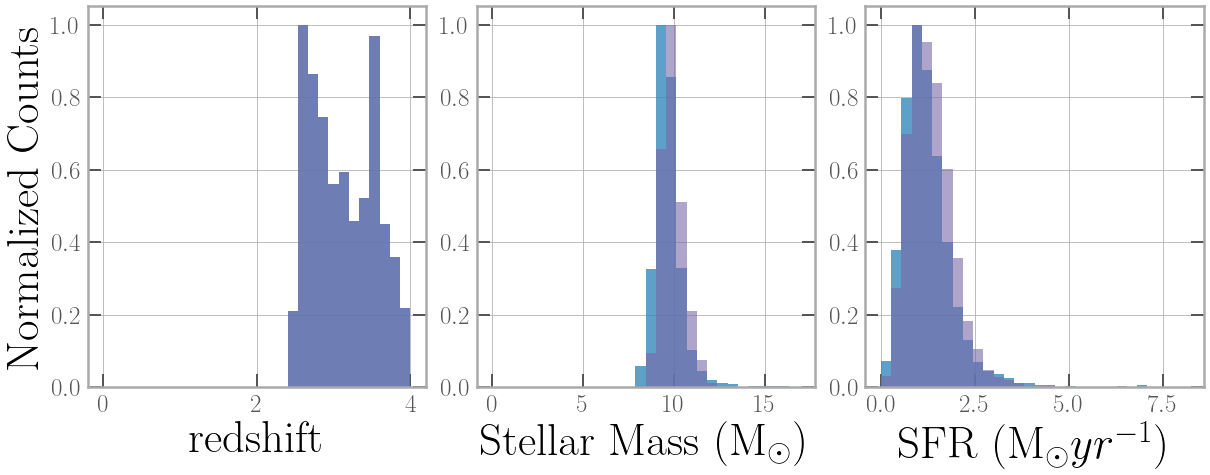

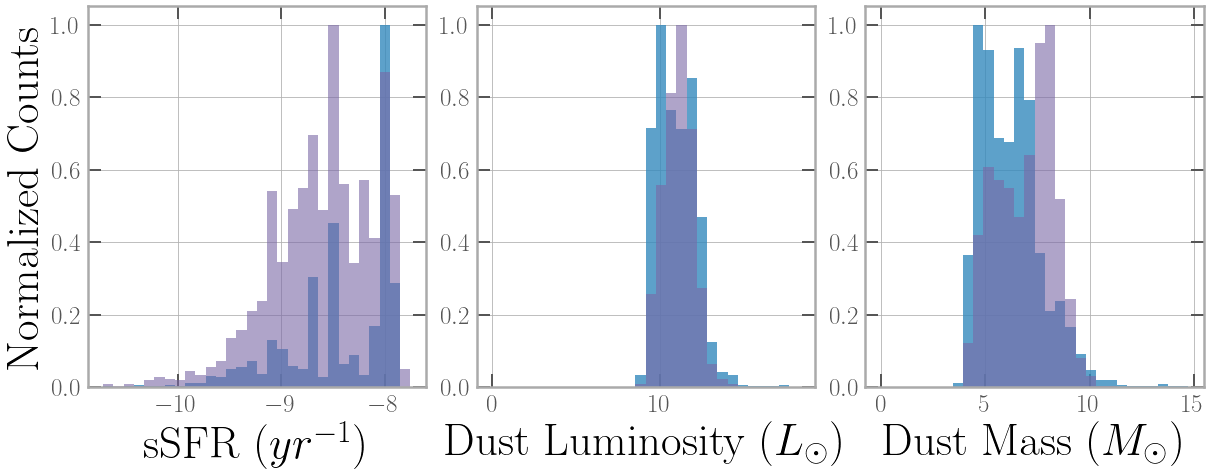

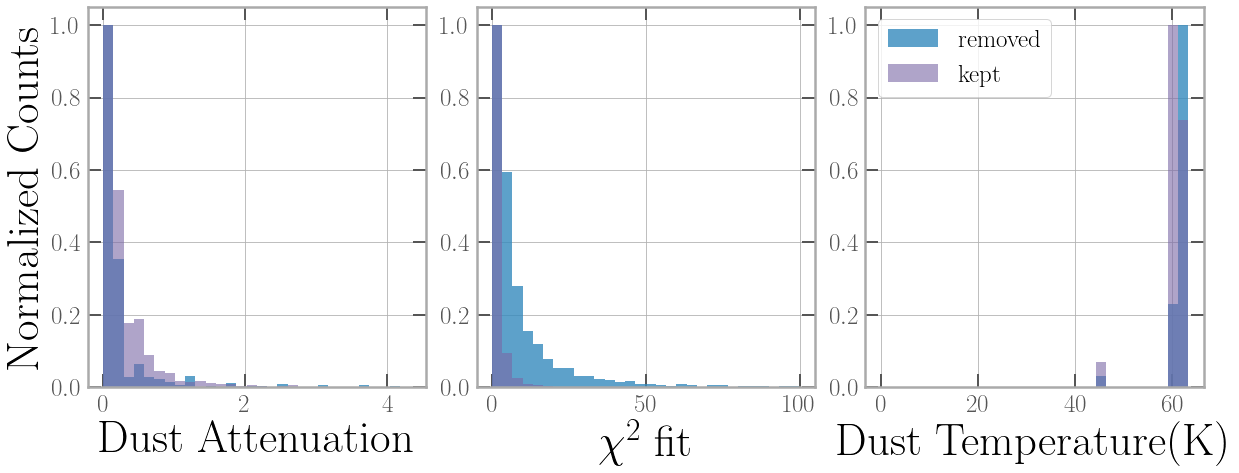

In [56]:
#Histograms for SEL and Non-SEL full datasets between redshifts 2.5 and 4
apples=(2.5<redshifts) & (redshifts<4)
oranges = (2.5<redshifth) & (redshifth<4)
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshifts[apples]),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshifts[apples], bins=bin_lims)
hist2, _ = np.histogram(redshifth[oranges], bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SMs[apples]),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SMs[apples], bins=bin_limsSM)
hist2SM, _ = np.histogram(SMh[oranges], bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFRs[apples]),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFRs[apples], bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFRh[oranges], bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFRs[apples]),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFRs[apples], bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFRh[oranges], bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldusts[apples]),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldusts[apples], bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldusth[oranges], bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdusts[apples]),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdusts[apples], bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdusth[oranges], bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISMs[apples])/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISMs[apples], bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISMh[oranges], bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2s[apples])/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2s[apples], bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2h[oranges], bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISMs[apples]),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISMs[apples], bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISMh[oranges], bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
plt.savefig('NormPotato1-SEL-cut',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
plt.savefig('NormPotato2-SEL-cut',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8,label='removed')
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6,label='kept')
plt.legend()
plt.tight_layout()
plt.savefig('NormPotato3-SEL-cut',bbox_inches='tight')
plt.show()
#Blue = SEL
#full sample with redshift 2.5-4 only. 

In [41]:
# rem = mag2['redshift'] != 0
maska = (redshifth>2.5) & (redshifth<3) #& (mag2['redshift'] != 0)
maskb = (redshifth<3.5) & (redshifth >3)
maskc = (redshifth<4) & (redshifth >3.5)

mask1a = (redshift>2.5) & (redshift<3) #& (mag2['redshift'] != 0)
mask1b = (redshift<3.5) & (redshift >3)
mask1c = (redshift<4) & (redshift >3.5)

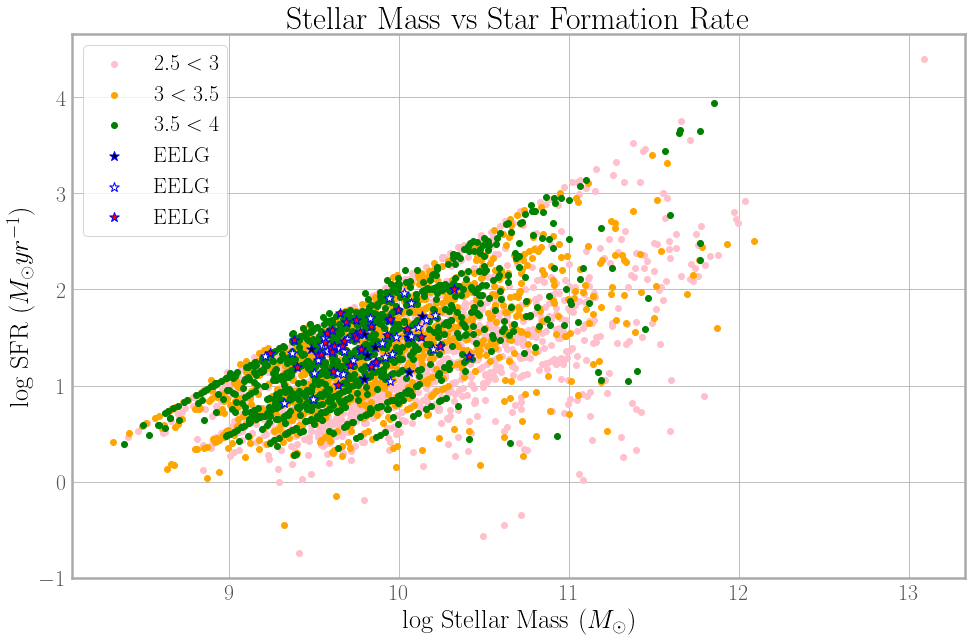

In [59]:
#SM vs SFR with redshifts between 2.5 and 4 (no SEL stuff here)
# plt.scatter(SM[mask6],SFR[mask6])
# smol=big[oranges]
maskchi=big['chi2']<10
# maskred=big['redshift']>0.1
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(SMh[maska*maskchi*oranges],SFRh[maska*maskchi*oranges],c='pink',label=r'$2.5<3$')
plt.scatter(SMh[maskb*maskchi*oranges],SFRh[maskb*maskchi*oranges],c='orange',label=r'$3<3.5$')
plt.scatter(SMh[maskc*maskchi*oranges],SFRh[maskc*maskchi*oranges],c='green',label=r'$3.5<4$')
plt.scatter(SM[mask1a],SFR[mask1a],marker='*',s=100,c='black',edgecolors='blue',label='EELG')
plt.scatter(SM[mask1b],SFR[mask1b],marker='*',s=100,c='white',edgecolors='blue',label='EELG')
plt.scatter(SM[mask1c],SFR[mask1c],marker='*',s=100,c='red',edgecolors='blue',label='EELG')#s=marker size
plt.ylabel('log SFR ($M_{\odot}yr^{-1}$)')
plt.xlabel('log Stellar Mass ($M_{\odot}$)')
plt.legend()
# plt.plot(SM,SM**0.96-7.2)
# plt.plot(SMa[rem],SMa[rem]**0.96-7.8)



plt.title('Stellar Mass vs Star Formation Rate')
plt.savefig('Mass Relation full-cut',bbox_inches='tight')
#create a mask of EELG galaxies and represent these as * with the colour corresponding to z
#once you have all 30911 galaxies.

In [43]:
# rem = mag2['redshift'] != 0
maska2 = (redshifts>2.5) & (redshifts<3) #& (mag2['redshift'] != 0)
maskb2 = (redshifts<3.5) & (redshifts >3)
maskc2 = (redshifts<4) & (redshifts >3.5)

mask1a2 = (redshift_ES>2.5) & (redshift_ES<3) #& (mag2['redshift'] != 0)
mask1b2 = (redshift_ES<3.5) & (redshift_ES >3)
mask1c2 = (redshift_ES<4) & (redshift_ES >3.5)

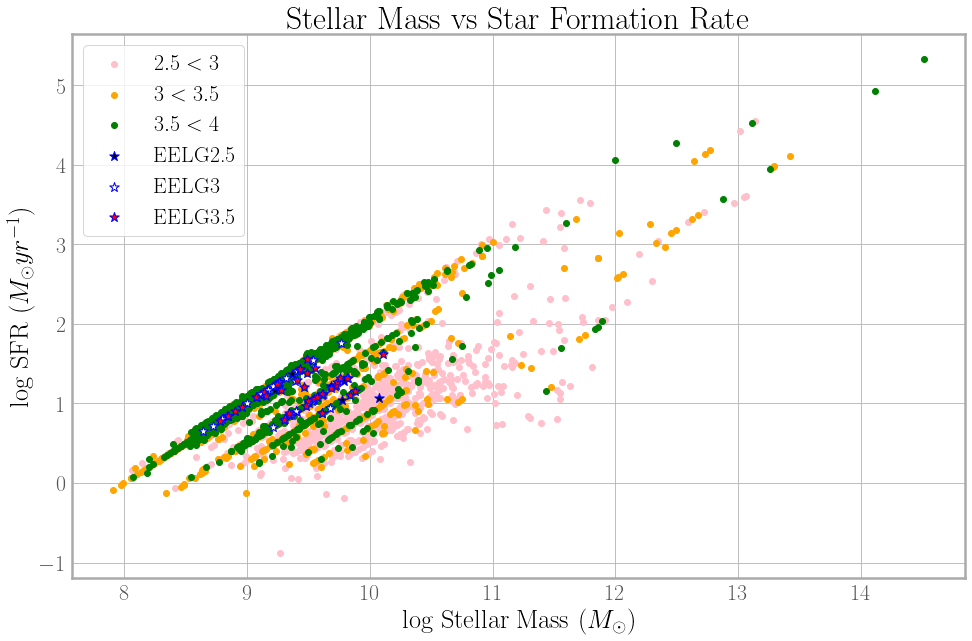

In [60]:
#SM vs SFR for SEL removed and for redshifts between 2.5-4 in the big sample.
# plt.scatter(SM[mask6],SFR[mask6]) 
# smol=big[oranges]
maskchi2=chi2s<10
# maskred=big['redshift']>0.1
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(SMs[maska2*maskchi2*apples],SFRs[maska2*maskchi2*apples],c='pink',label=r'$2.5<3$')
plt.scatter(SMs[maskb2*maskchi2*apples],SFRs[maskb2*maskchi2*apples],c='orange',label=r'$3<3.5$')
plt.scatter(SMs[maskc2*maskchi2*apples],SFRs[maskc2*maskchi2*apples],c='green',label=r'$3.5<4$')
plt.scatter(SM_ES[mask1a2],SFR_ES[mask1a2],marker='*',s=100,c='black',edgecolors='blue',label='EELG2.5')
plt.scatter(SM_ES[mask1b2],SFR_ES[mask1b2],marker='*',s=100,c='white',edgecolors='blue',label='EELG3')
plt.scatter(SM_ES[mask1c2],SFR_ES[mask1c2],marker='*',s=100,c='red',edgecolors='blue',label='EELG3.5')#s=marker size
plt.ylabel('log SFR ($M_{\odot}yr^{-1}$)')
plt.xlabel('log Stellar Mass ($M_{\odot}$)')
plt.legend()
# plt.plot(SM,SM**0.96-7.2)
# plt.plot(SMa[rem],SMa[rem]**0.96-7.8)



plt.title('Stellar Mass vs Star Formation Rate')
plt.savefig('Mass Relation full-SEL-cut',bbox_inches='tight')
#create a mask of EELG galaxies and represent these as * with the colour corresponding to z
#once you have all 30911 galaxies.

In [48]:
print(len(SMh))
SMh_massmask=(SMh> min(SM)) & (SMh<max(SM))
print(len(SMh[SMh_massmask]))
print(len(SMh[SMh_massmask*oranges]))

24091
11909
3026


/tmp/ipykernel_10644/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_10644/234313586.py:142: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_10644/234313586.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


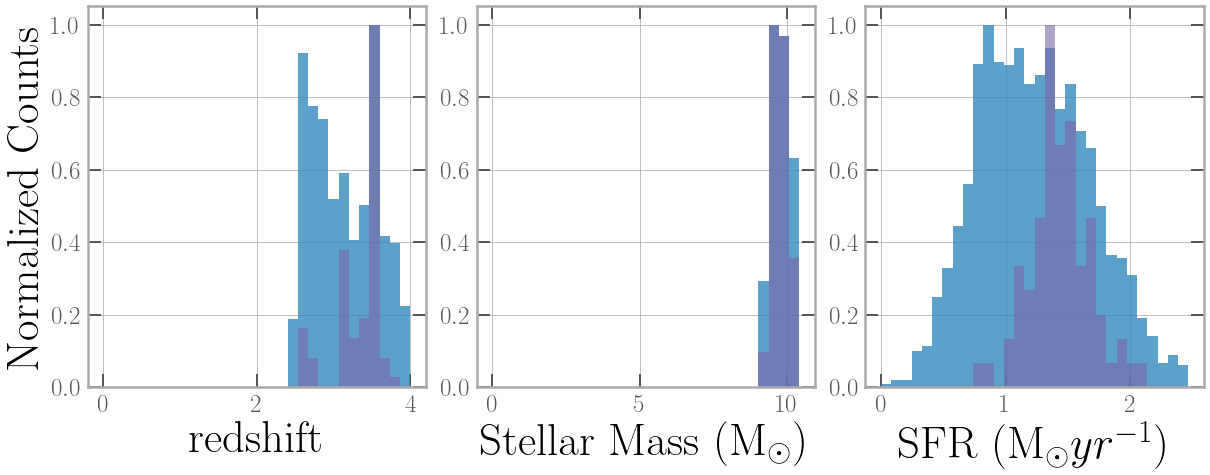

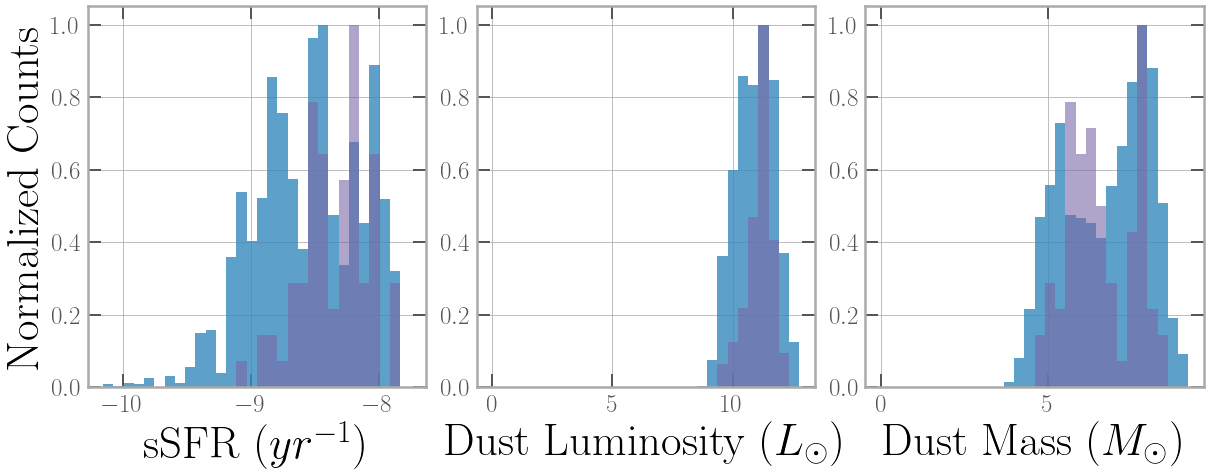

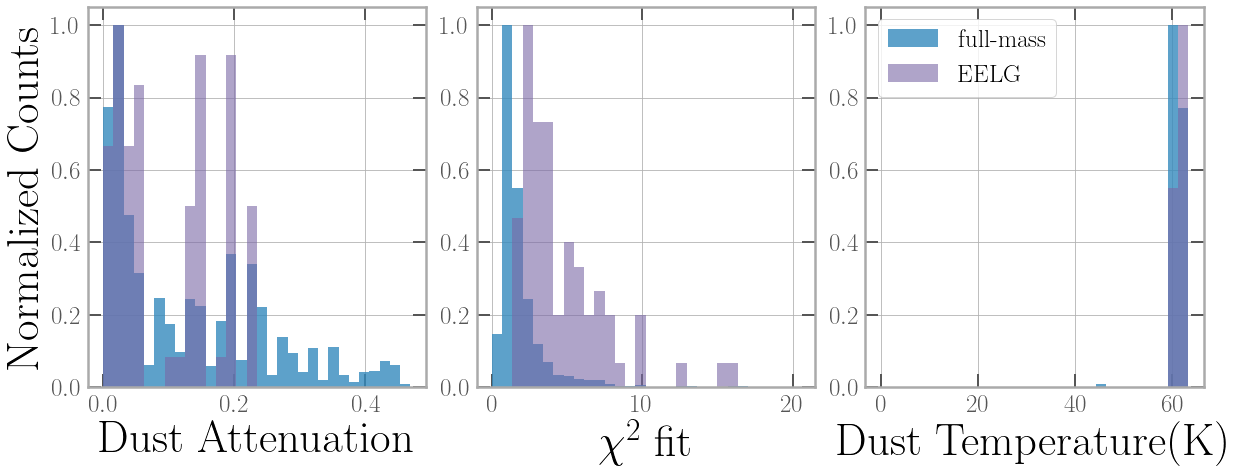

In [62]:
#nonSEL histograms for galaxies between z2.5-4 and mass between min(SM_EELG) and max(SM_EELG)

##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshifth[SMh_massmask*oranges]),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshifth[SMh_massmask*oranges], bins=bin_lims)
hist2, _ = np.histogram(redshift, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SMh[SMh_massmask*oranges]),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SMh[SMh_massmask*oranges], bins=bin_limsSM)
hist2SM, _ = np.histogram(SM, bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFRh[SMh_massmask*oranges]),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFRh[SMh_massmask*oranges], bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFR, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFRh[SMh_massmask*oranges]),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFRh[SMh_massmask*oranges], bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFR, bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldusth[SMh_massmask*oranges]),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldusth[SMh_massmask*oranges], bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldust, bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdusth[SMh_massmask*oranges]),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdusth[SMh_massmask*oranges], bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdust, bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISMh[SMh_massmask*oranges])/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISMh[SMh_massmask*oranges], bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISM, bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2h[SMh_massmask*oranges])/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2h[SMh_massmask*oranges], bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2, bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISMh[SMh_massmask*oranges]),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISMh[SMh_massmask*oranges], bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISM, bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
plt.savefig('NormPotato1-masscut',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
plt.savefig('NormPotato2-masscut',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8,label='full-mass')
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6,label='EELG')
plt.legend()
plt.tight_layout()
plt.savefig('NormPotato3-masscut',bbox_inches='tight')
plt.show()
#Blue = SEL
#full sample with redshift 2.5-4 only. 

In [45]:
#masks for comparing EELG and normal galaxies with the same mass/redshift range
print(len(SMs))
SM_massmask=(SMs> min(SM_ES)) & (SMs<max(SM_ES))
print(len(SMs[SM_massmask]))
SM_SEL_comp = SMs[SM_massmask*apples]
print(len(SM_SEL_comp))

24091
11706
3227


/tmp/ipykernel_10644/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_10644/454164823.py:142: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_10644/454164823.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


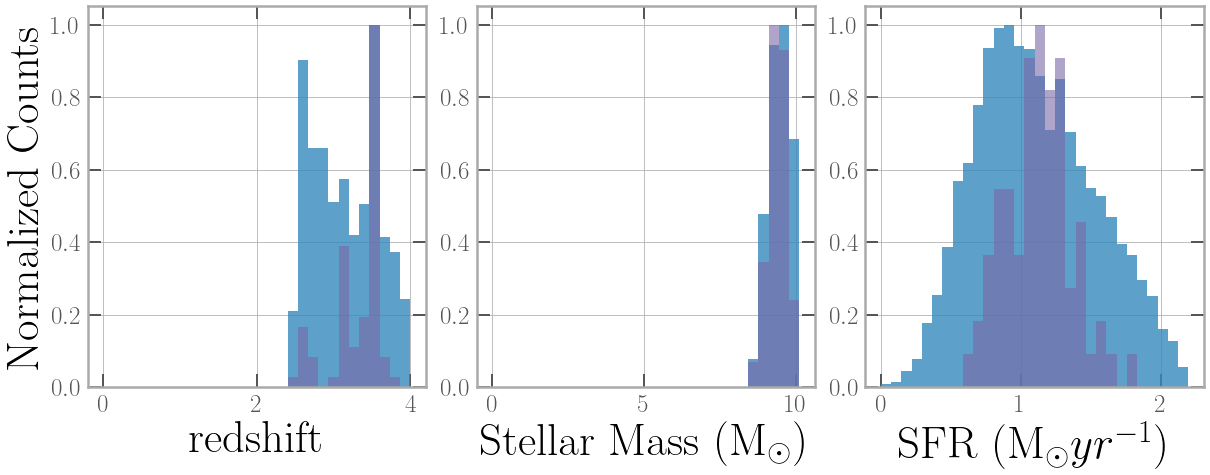

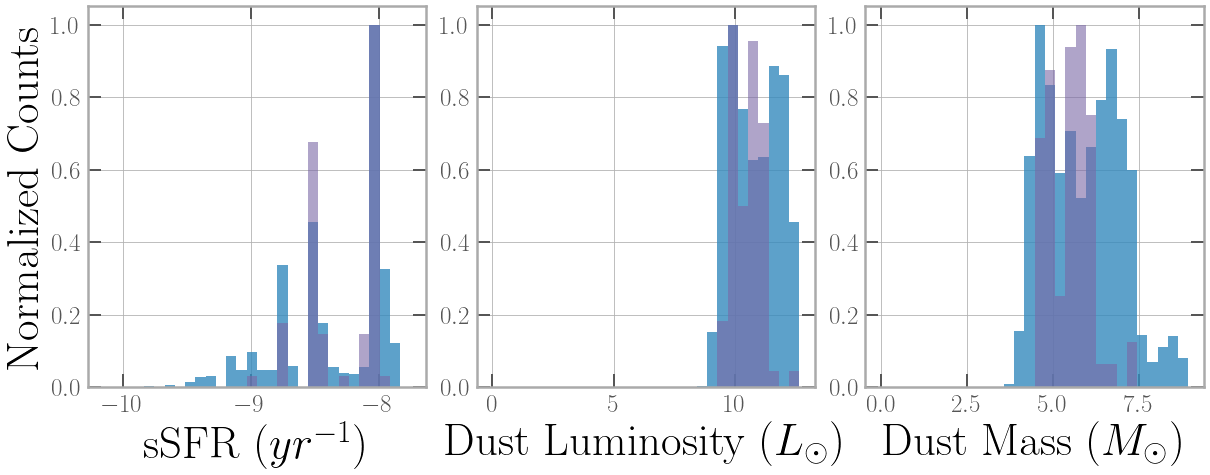

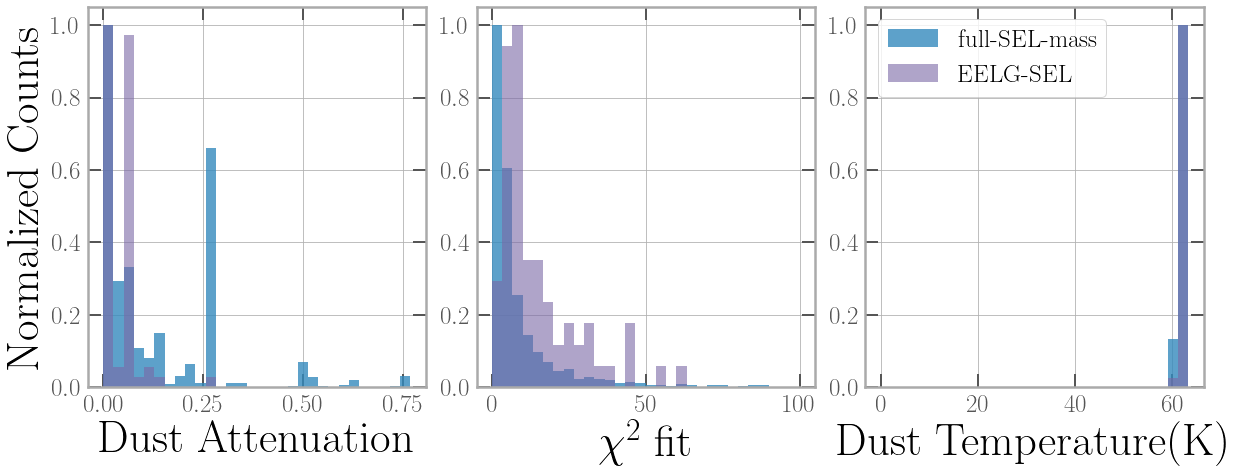

In [63]:
#SEL histograms for galaxies between z2.5-4 and mass between min(SEL_EELG) and max(SEL_EELG)

##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshifts[SM_massmask*apples]),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshifts[SM_massmask*apples], bins=bin_lims)
hist2, _ = np.histogram(redshift_ES, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SMs[SM_massmask*apples]),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SMs[SM_massmask*apples], bins=bin_limsSM)
hist2SM, _ = np.histogram(SM_ES, bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFRs[SM_massmask*apples]),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFRs[SM_massmask*apples], bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFR_ES, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFRs[SM_massmask*apples]),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFRs[SM_massmask*apples], bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFR_ES, bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldusts[SM_massmask*apples]),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldusts[SM_massmask*apples], bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldust_ES, bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdusts[SM_massmask*apples]),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdusts[SM_massmask*apples], bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdust_ES, bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISMs[SM_massmask*apples])/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISMs[SM_massmask*apples], bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISM_ES, bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2s[SM_massmask*apples])/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2s[SM_massmask*apples], bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2_ES, bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISMs[SM_massmask*apples]),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISMs[SM_massmask*apples], bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISM_ES, bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
plt.savefig('NormPotato1-masscut-SEL',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
plt.savefig('NormPotato2-masscut-SEL',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8,label='full-SEL-mass')
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6,label='EELG-SEL')
plt.legend()
plt.tight_layout()
plt.savefig('NormPotato3-masscut-SEL',bbox_inches='tight')
plt.show()

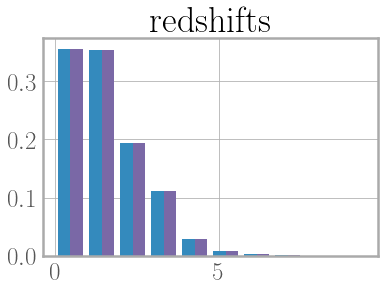

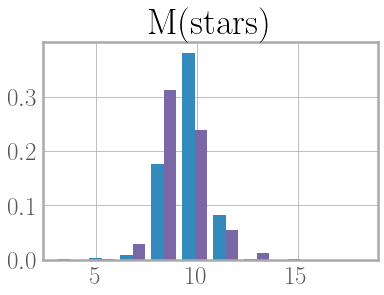

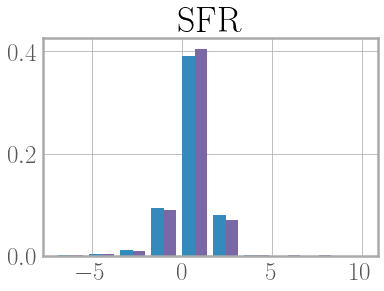

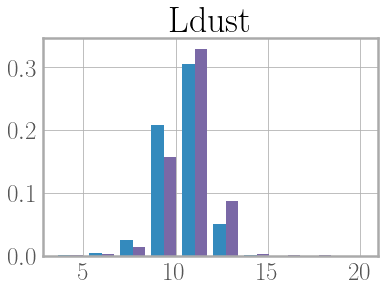

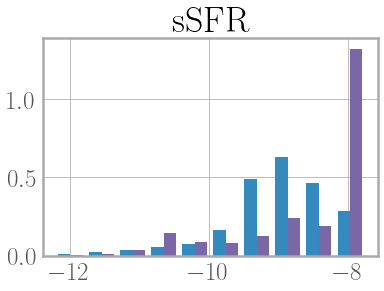

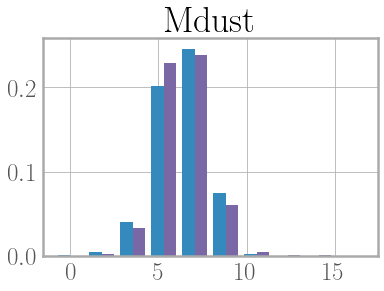

In [47]:
# x,bins,p=plt.hist([redshifth,redshift], bins=20, density=True, histtype='bar')#, stacked=True)
x, bins, p=plt.hist([redshifth,redshifts], density=True)
# plt.bar(x, y2 ,bottom=y1,label='y2')
# for item in p:
#     item.set_height(item.get_height()/sum(x))
plt.title('redshifts')
plt.show()
# plt.hist([SMh,SM], bins=20, density=True, histtype='bar', stacked=True)
x, bins, p=plt.hist([SMh,SMs], density=True)
plt.title('M(stars)')
plt.show()
# plt.hist([SFRh,SFR], bins=20, density=True, histtype='bar', stacked=True)
x, bins, p=plt.hist([SFRh,SFRs], density=True)
plt.title('SFR')
plt.show()
# plt.hist([Ldusth,Ldust], bins=20, density=True, histtype='bar', stacked=True)
x, bins, p=plt.hist([Ldusth,Ldusts], density=True)
plt.title('Ldust')
plt.show()
# plt.hist([sSFRh,sSFR], bins=20, density=True, histtype='bar', stacked=True)
x, bins, p=plt.hist([sSFRh,sSFRs], density=True)
plt.title('sSFR')
plt.show()
# plt.hist([Mdusth,Mdust], bins=20, density=True, histtype='bar', stacked=True)
x, bins, p=plt.hist([Mdusth,Mdusts], density=True)
plt.title('Mdust')
plt.show()

<Figure size 1440x720 with 0 Axes>

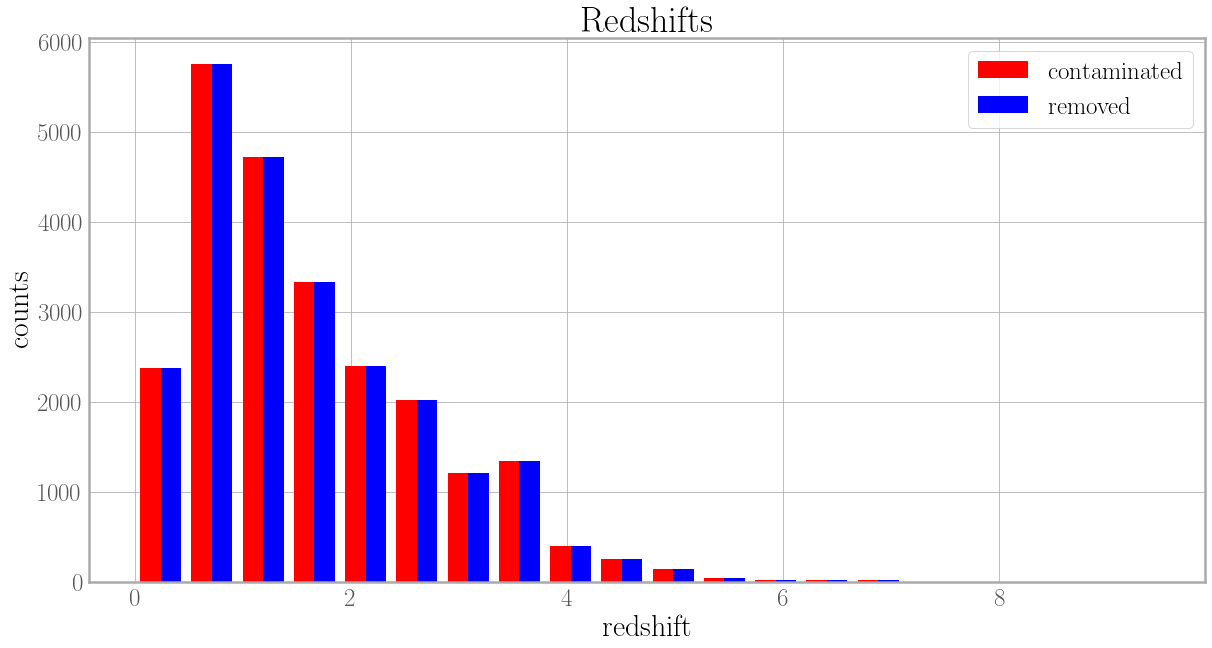

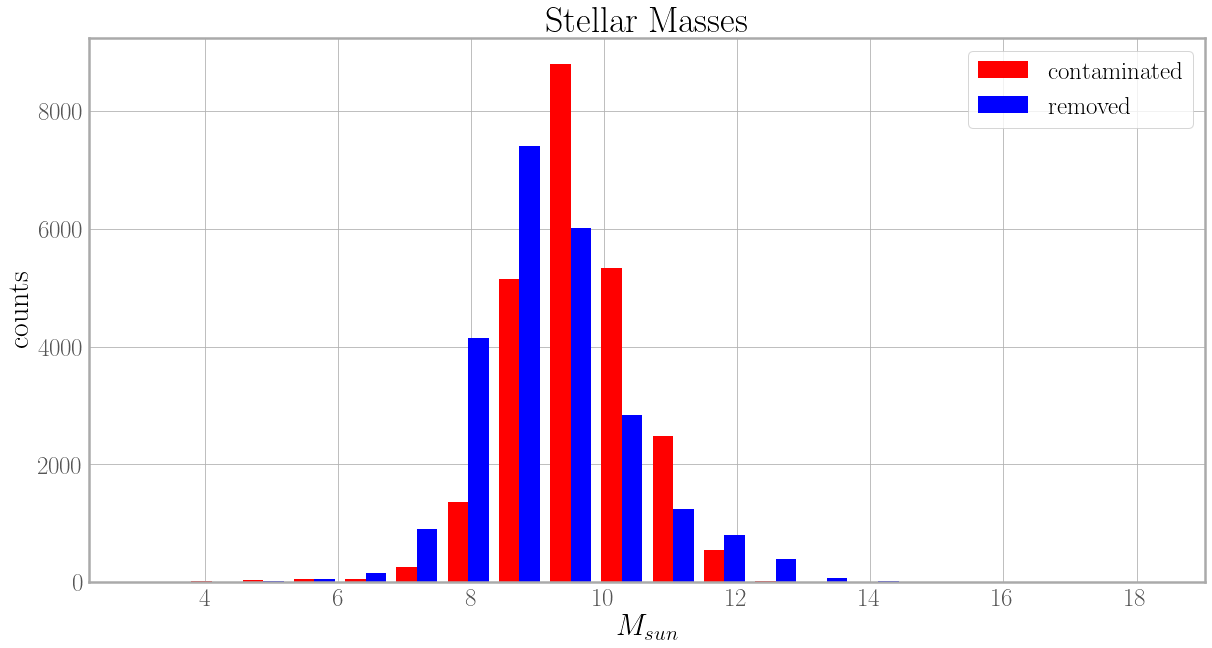

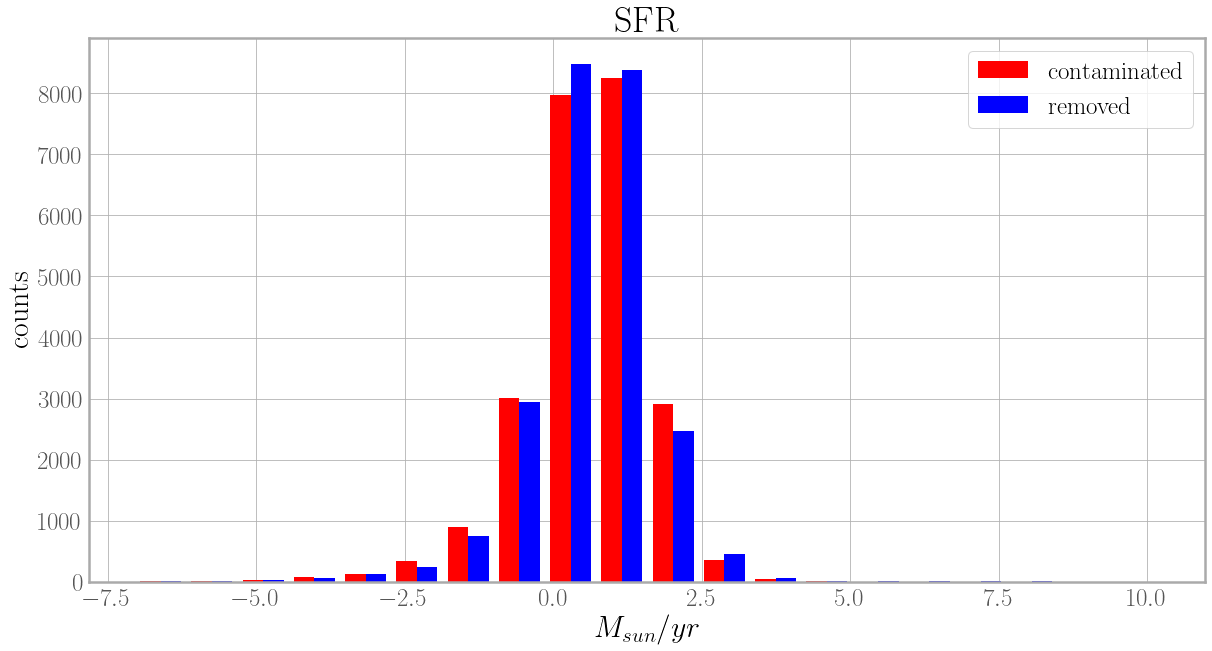

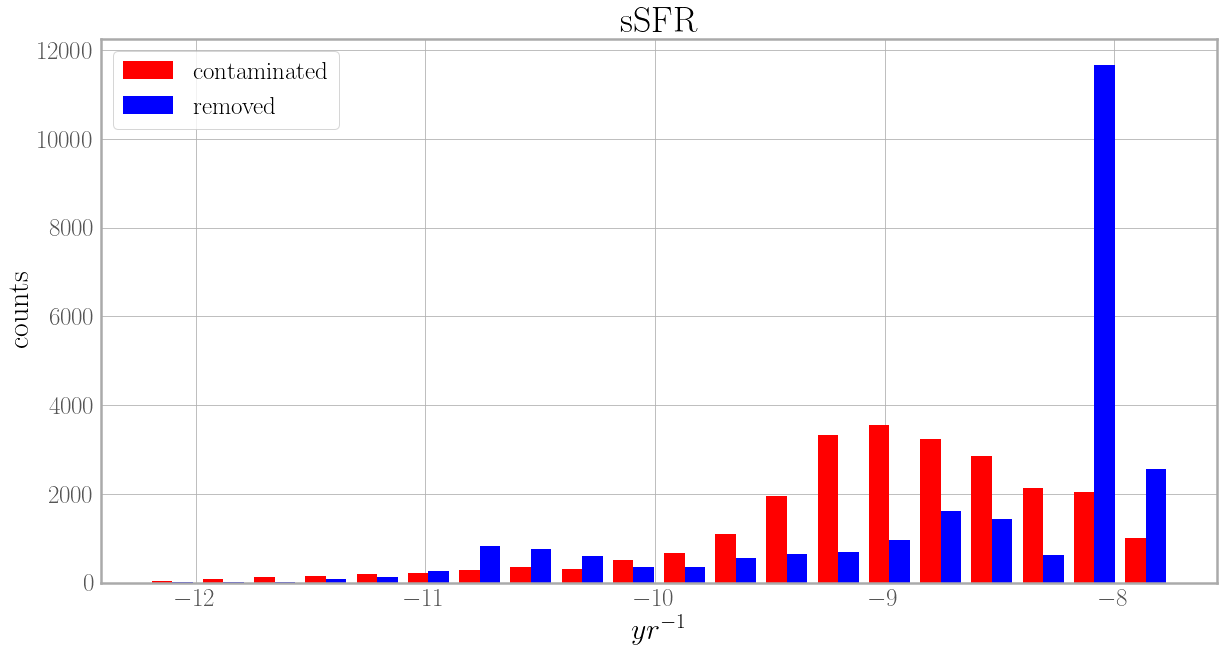

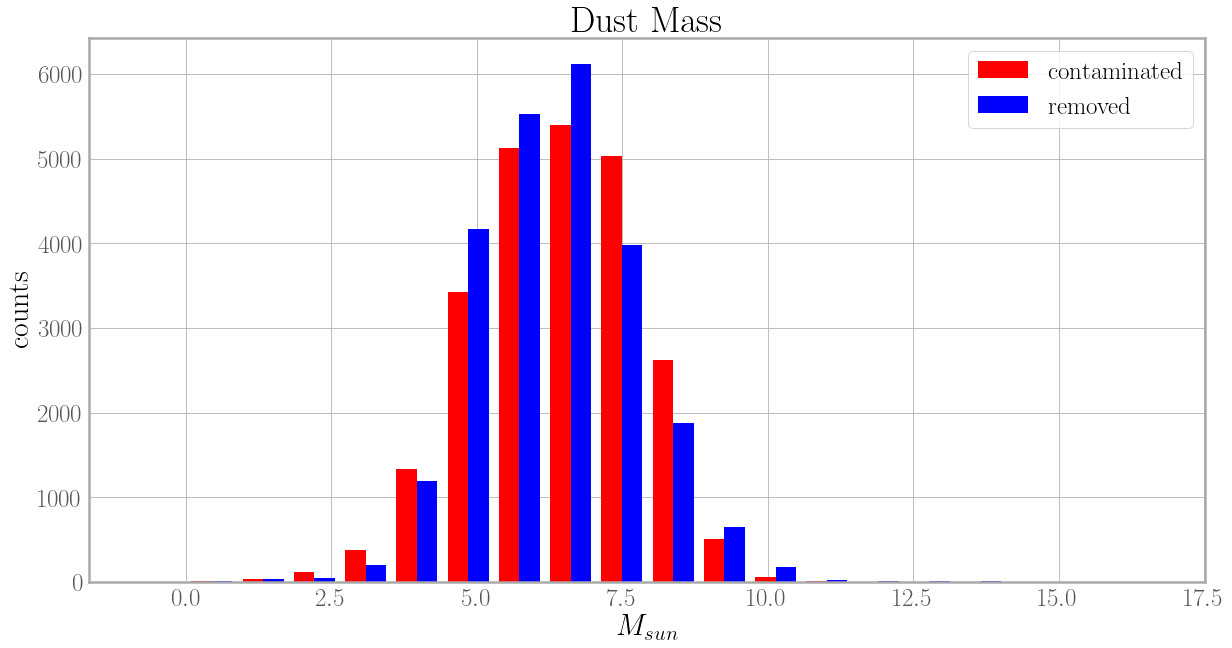

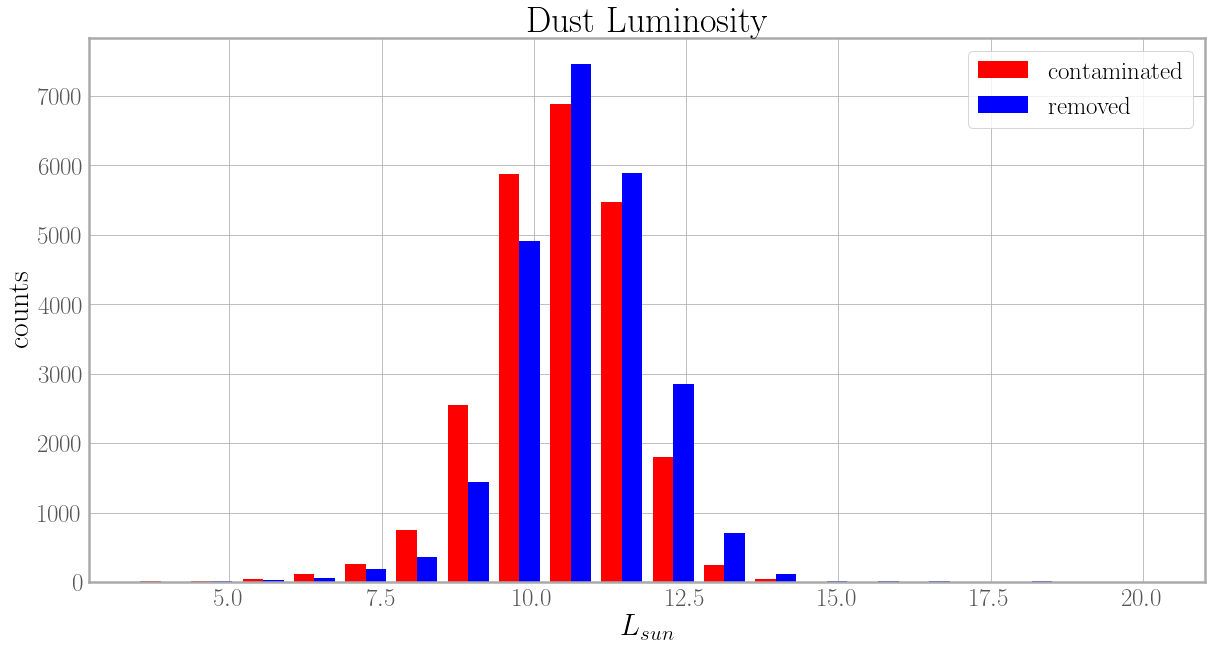

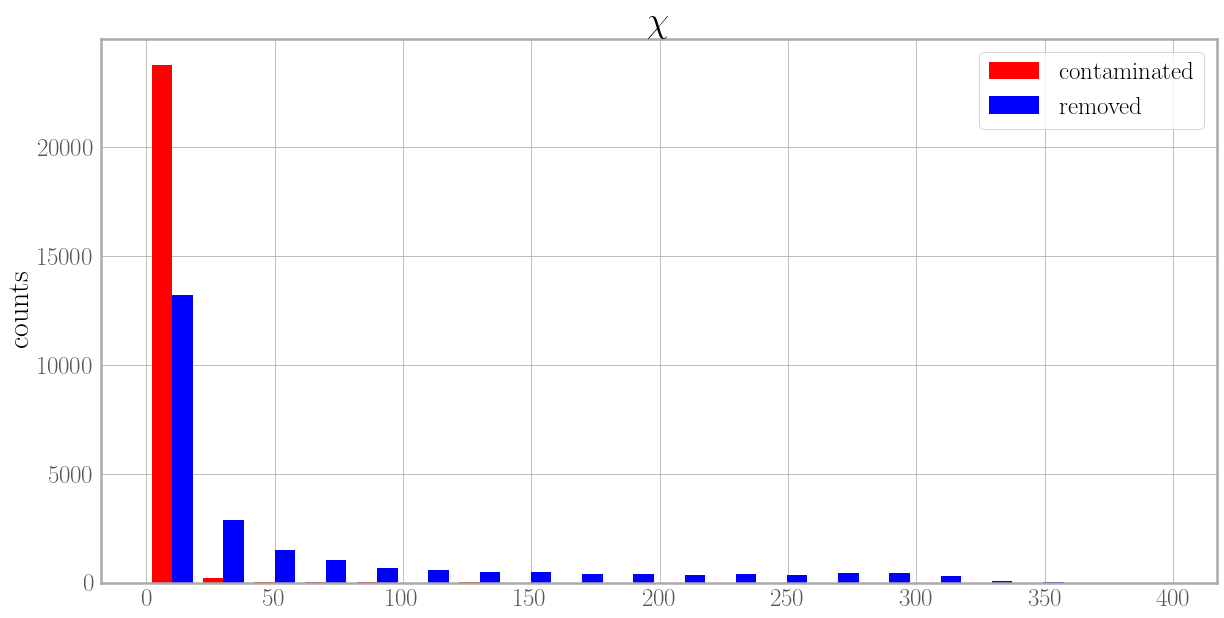

<Figure size 1440x720 with 0 Axes>

In [85]:
plt.figure(figsize=(20,10))
plt.hist([redshifth,redshifts],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Redshifts')
plt.xlabel('redshift')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL1',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([SMh,SMs],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Stellar Masses')
plt.xlabel(r'$M_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL2',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([SFRh,SFRs],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('SFR')
plt.xlabel(r'$M_{sun}/yr$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL3',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([sSFRh,sSFRs],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('sSFR')
plt.xlabel(r'$yr^{-1}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL4',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([Mdusth,Mdusts],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Dust Mass')
plt.xlabel(r'$M_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL5',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([Ldusth,Ldusts],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Dust Luminosity')
plt.xlabel(r'$L_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL6',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([chi2h,chi2s],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title(r'$\chi$')
plt.xlabel('')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL7',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################

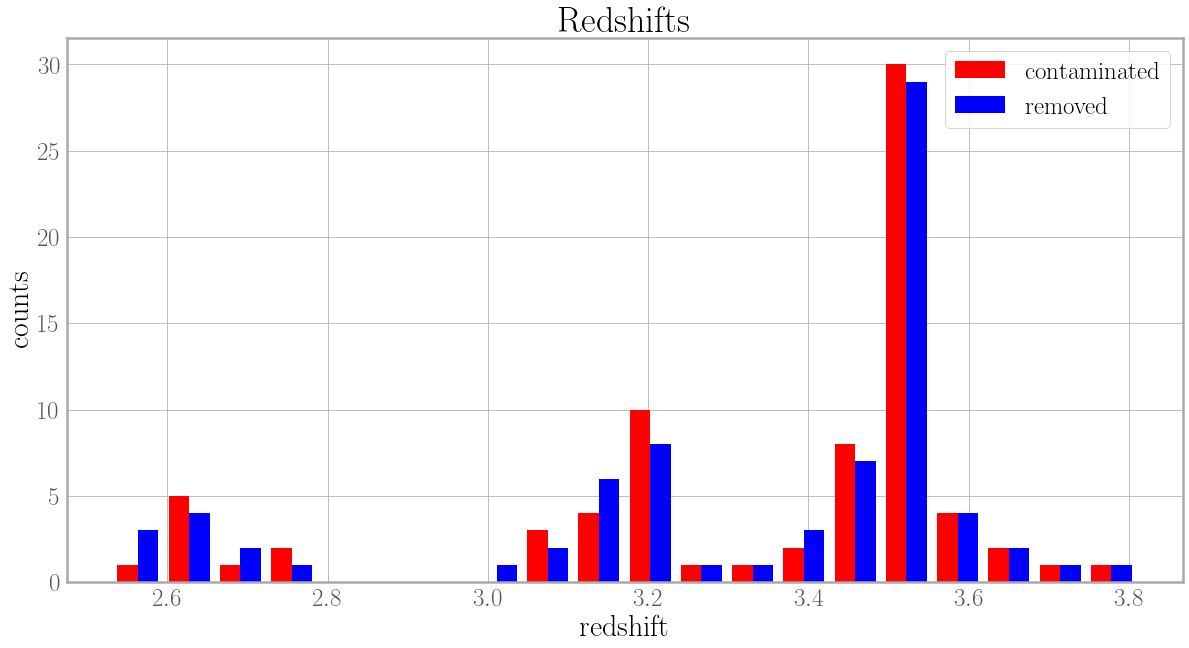

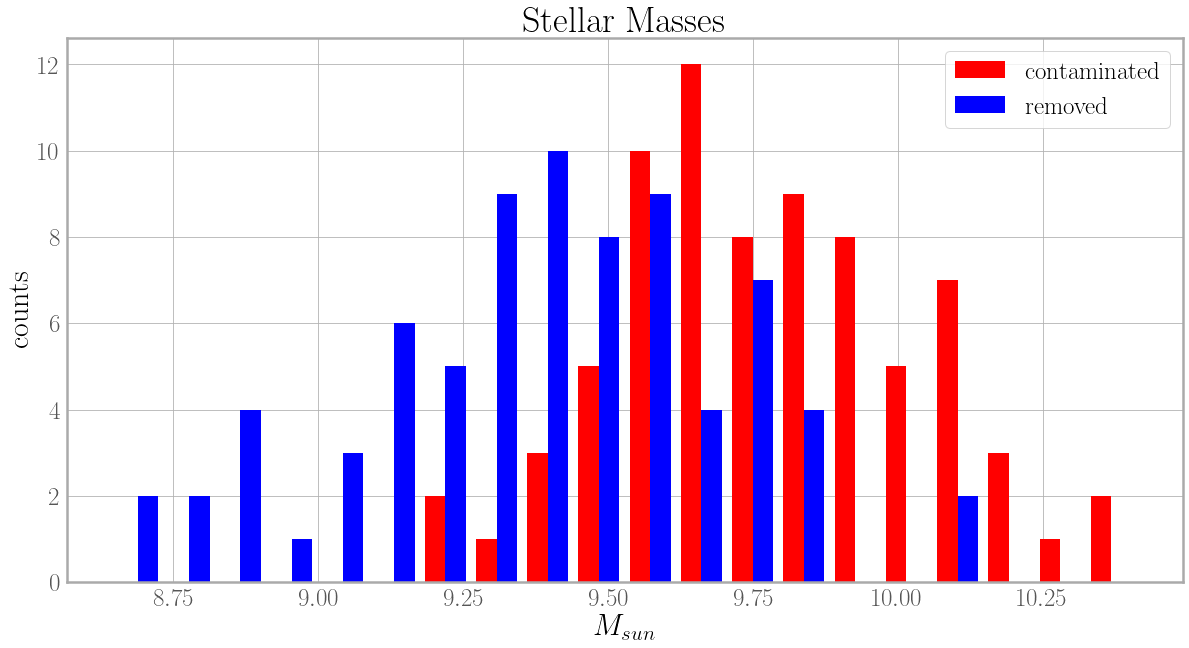

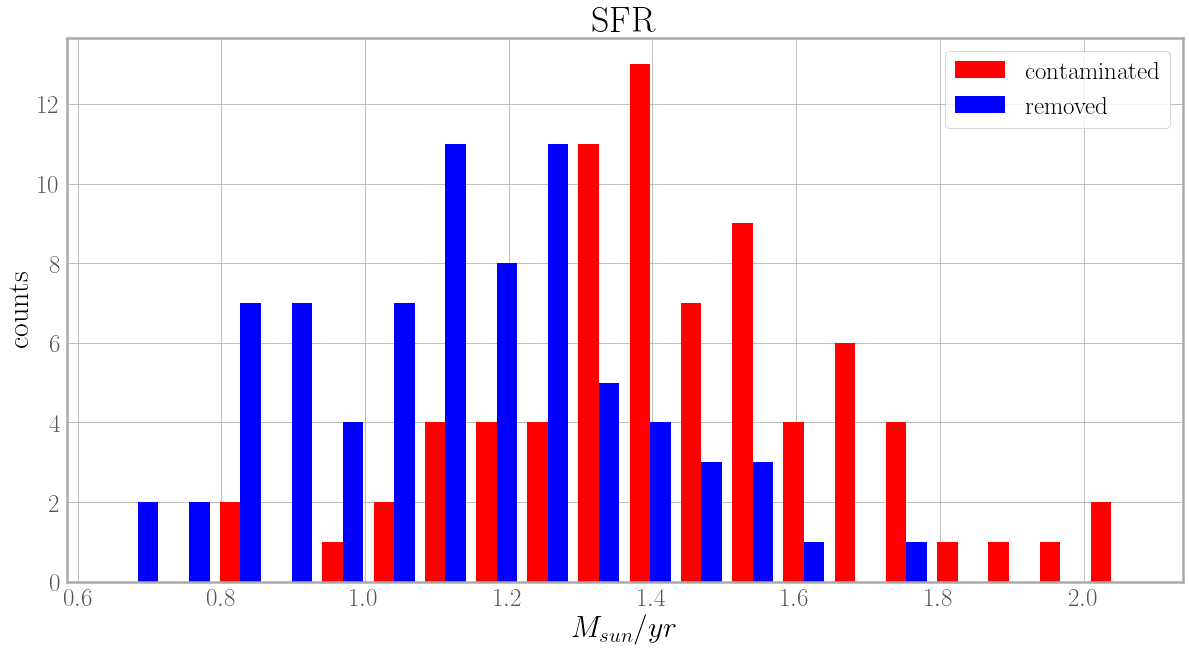

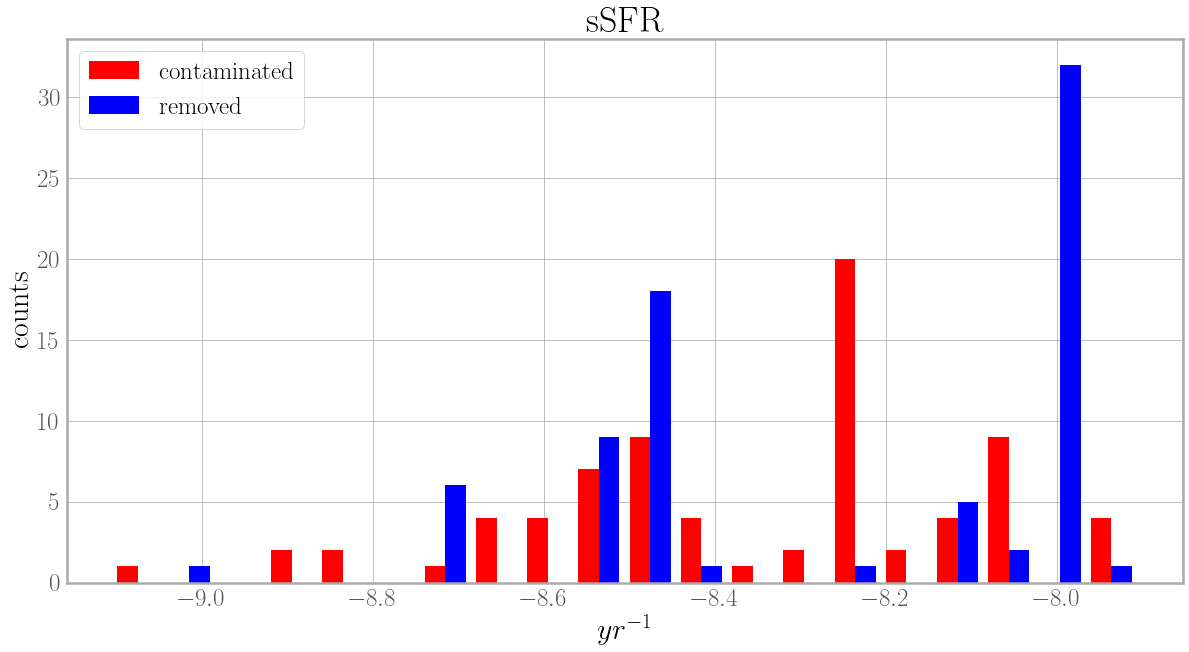

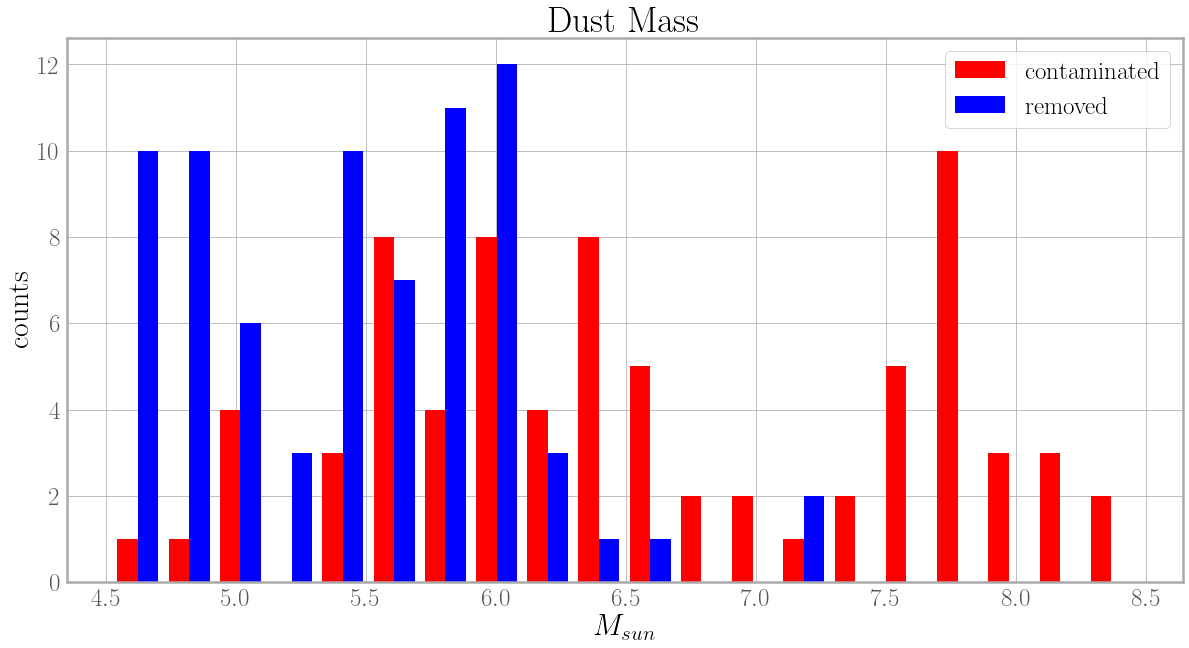

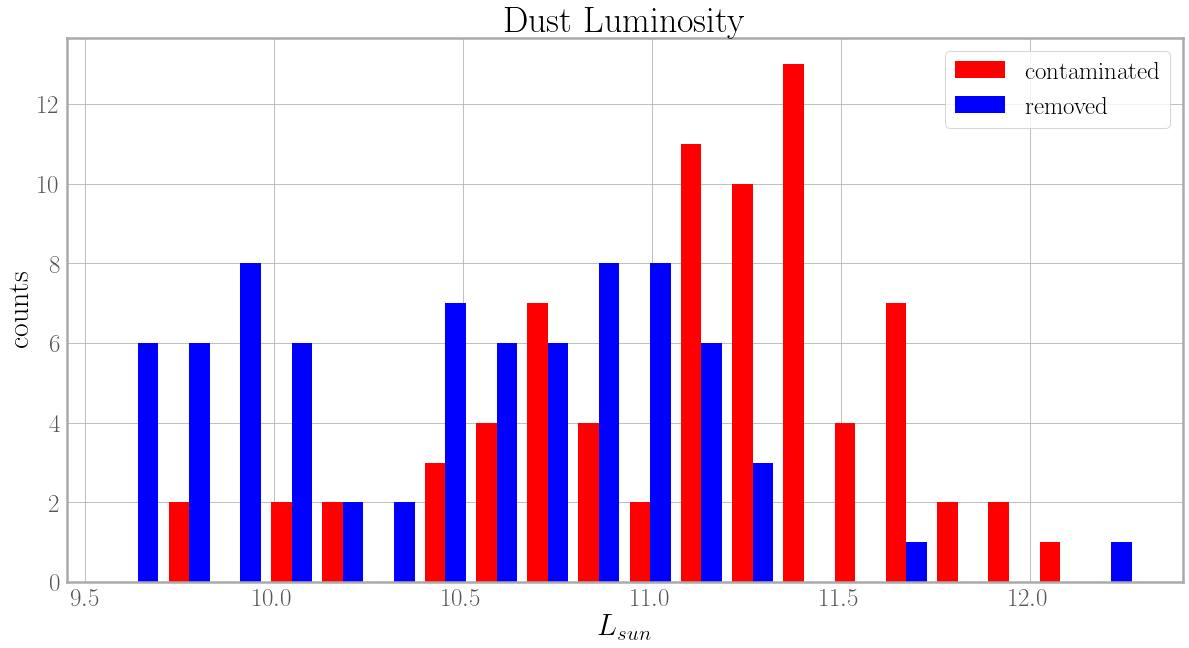

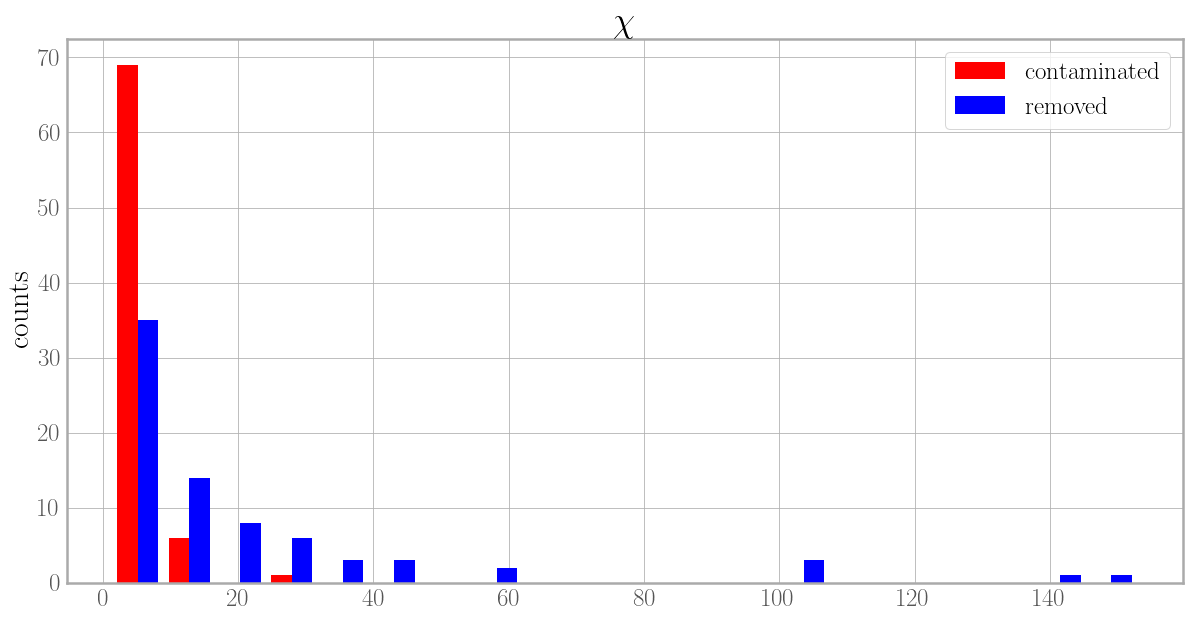

In [87]:
plt.figure(figsize=(20,10))
plt.hist([redshift,redshift_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Redshifts')
plt.xlabel('redshift')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL1EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([SM,SM_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Stellar Masses')
plt.xlabel(r'$M_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL2EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([SFR,SFR_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('SFR')
plt.xlabel(r'$M_{sun}/yr$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL3EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([sSFR,sSFR_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('sSFR')
plt.xlabel(r'$yr^{-1}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL4EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([Mdust,Mdust_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Dust Mass')
plt.xlabel(r'$M_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL5EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([Ldust,Ldust_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Dust Luminosity')
plt.xlabel(r'$L_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL6EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([chi2,chi2_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title(r'$\chi$')
plt.xlabel('')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL7EELGS',bbox_inches='tight')
# plt.figure(figsize=(20,10))
######################################################################################

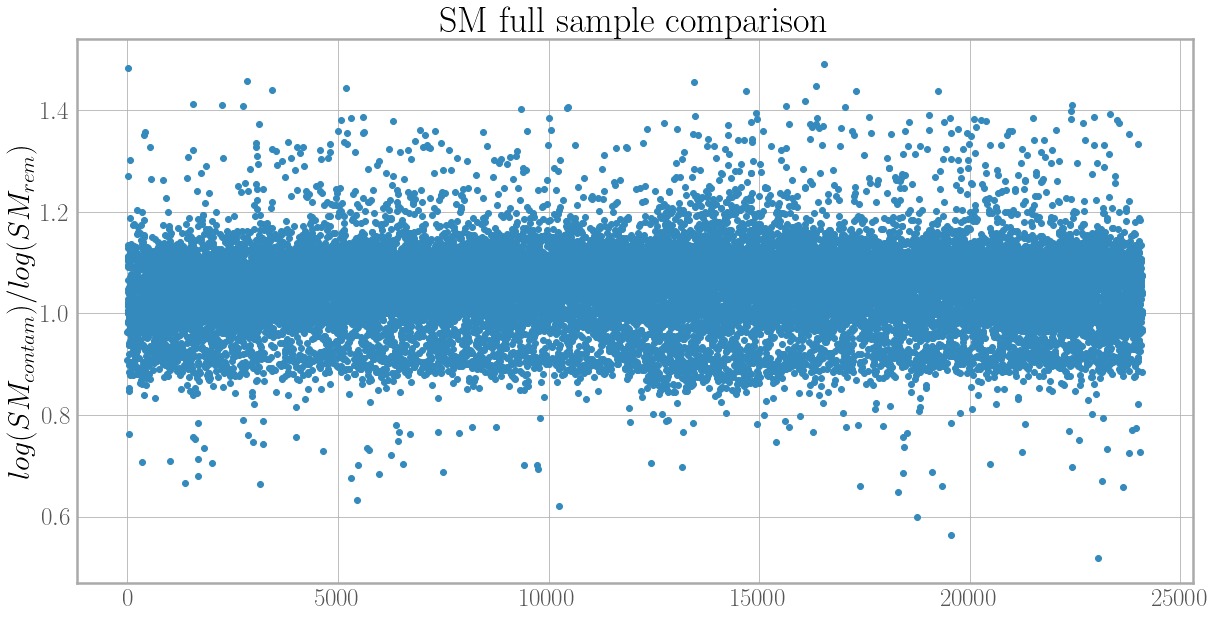

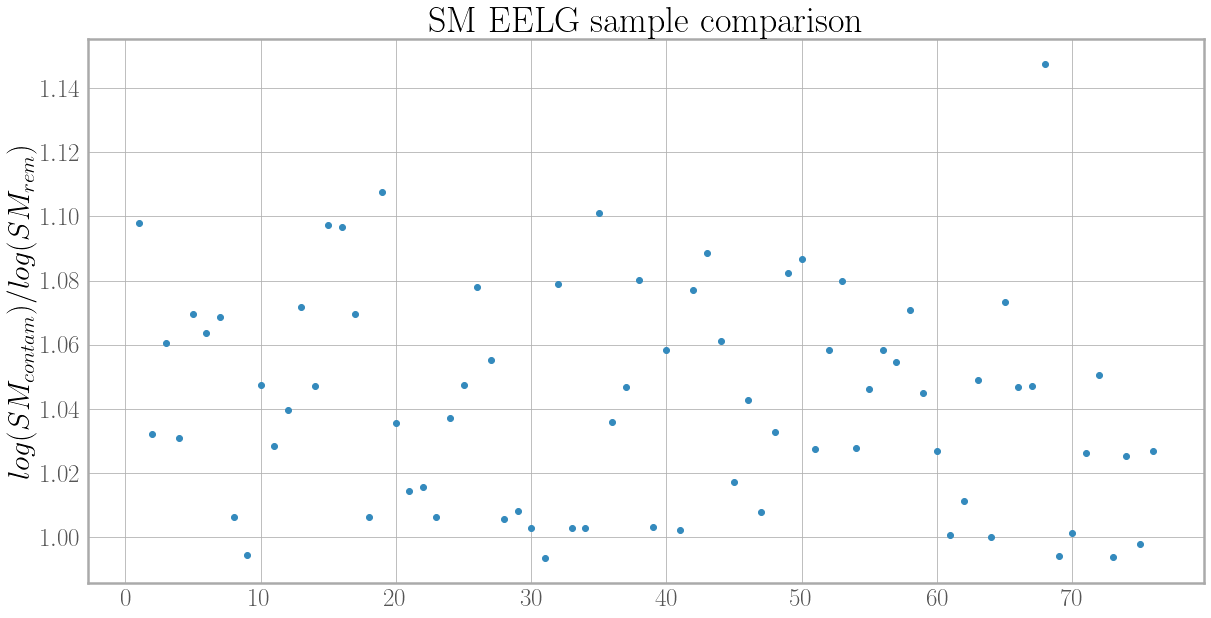

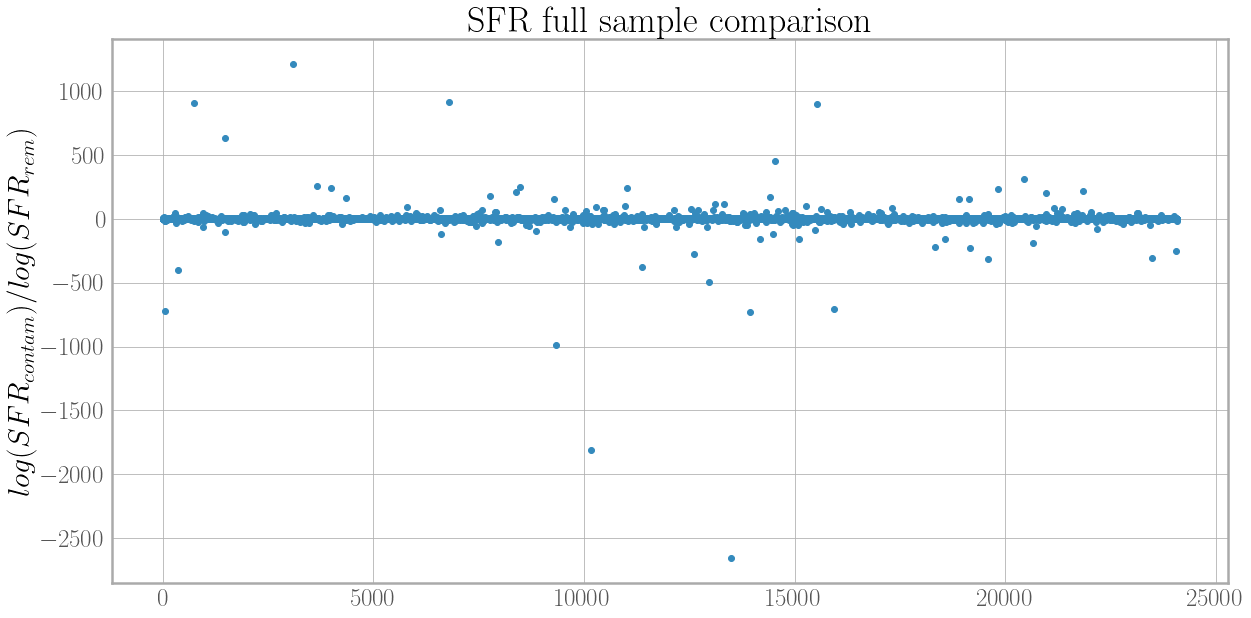

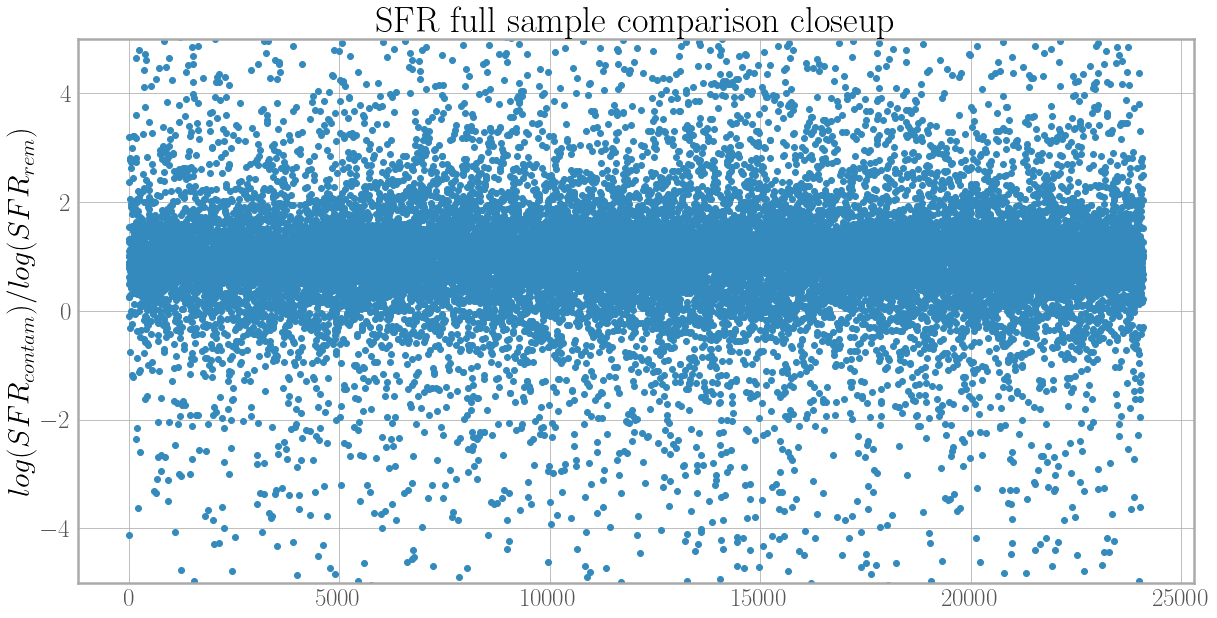

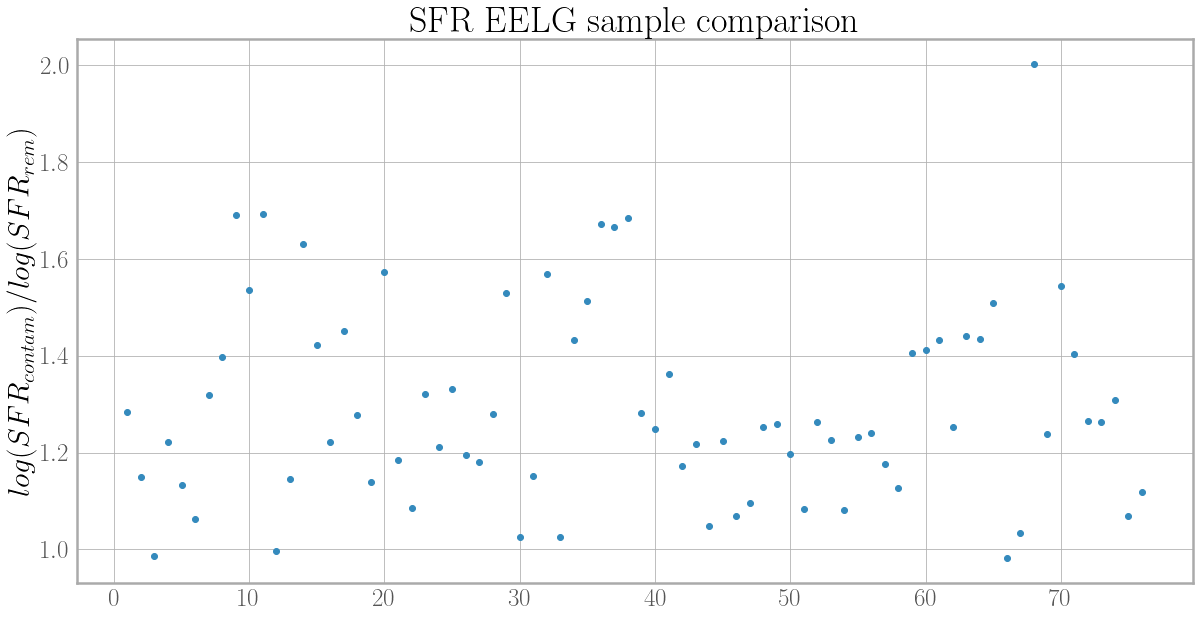

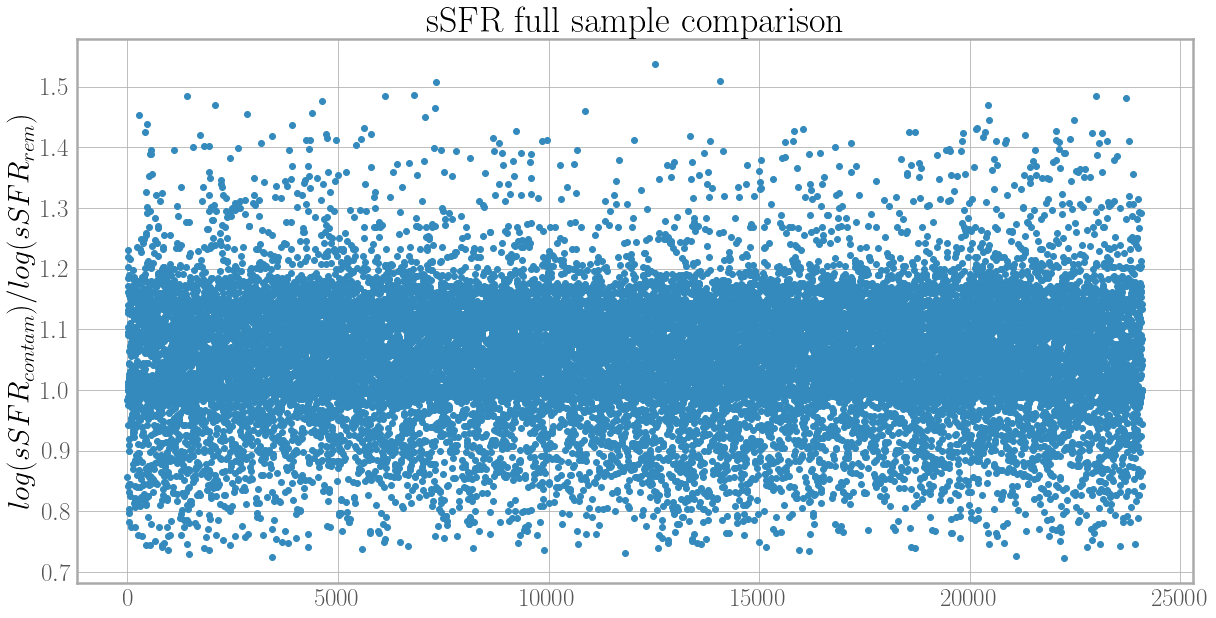

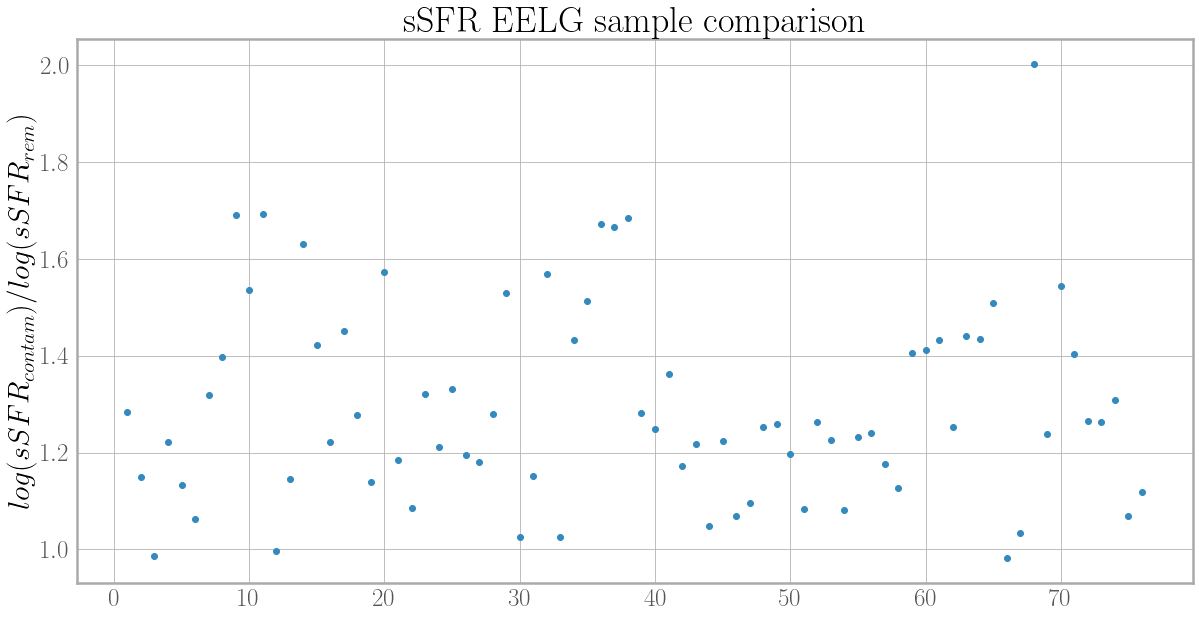

In [115]:
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SMh),len(SMh)),(SMh/SMs))
plt.ylabel(r'$log(SM_{contam})/log(SM_{rem})$')
plt.title('SM full sample comparison')
plt.savefig('SeptemberUpdateSM1',bbox_inches='tight')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SM),len(SM)),(SM/SM_ES))
plt.ylabel(r'$log(SM_{contam})/log(SM_{rem})$')
plt.title('SM EELG sample comparison')
plt.savefig('SeptemberUpdateSM2',bbox_inches='tight')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SFRh),len(SFRh)),(SFRh/SFRs))
plt.ylabel(r'$log(SFR_{contam})/log(SFR_{rem})$')
plt.savefig('SeptemberUpdateSFR1a',bbox_inches='tight')
plt.title('SFR full sample comparison')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SFRh),len(SFRh)),(SFRh/SFRs))
plt.ylabel(r'$log(SFR_{contam})/log(SFR_{rem})$')
plt.title('SFR full sample comparison closeup')
plt.ylim(-5,5)
plt.savefig('SeptemberUpdateSFR1b',bbox_inches='tight')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SFR),len(SFR)),(SFR/SFR_ES))
plt.ylabel(r'$log(SFR_{contam})/log(SFR_{rem})$')
plt.title('SFR EELG sample comparison')
plt.savefig('SeptemberUpdateSFR2',bbox_inches='tight')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(sSFRh),len(sSFRh)),(sSFRh/sSFRs))
plt.ylabel(r'$log(sSFR_{contam})/log(sSFR_{rem})$')
plt.title('sSFR full sample comparison')
plt.savefig('SeptemberUpdate_sSFR1',bbox_inches='tight')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SFR),len(SFR)),(SFR/SFR_ES))
plt.ylabel(r'$log(sSFR_{contam})/log(sSFR_{rem})$')
plt.title('sSFR EELG sample comparison')
plt.savefig('SeptemberUpdate_sSFR2',bbox_inches='tight')
